# Insurance Claims-Fraud Detection

Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

Loading the dataset from github

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

we have 1000 rows and 40 columns in our dataframe. We have a lot of columns in our dataframe. We have to predict if the insurance claim is a fraud or not and hence our target column becomes fraud_reported. We can see that the fraud_reported column has binary data therefore this becomes a binary classification problem. We have columns that have numerical data as well as categorical data, therefore this will also be have to taken care of

EDA

Since there are 40 columns i will set the display.max_columns to display all the columns

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

Now let us check out our columns

In [5]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

we have 40 columns in our dataframe

# Checking Null Values in our Data Frame

In [6]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

the _c39 column has 1000 null values, therefore it is best to drop ths column

In [7]:
df.drop('_c39',axis=1,inplace=True)

In [8]:
df.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

now we have no null values

<AxesSubplot:>

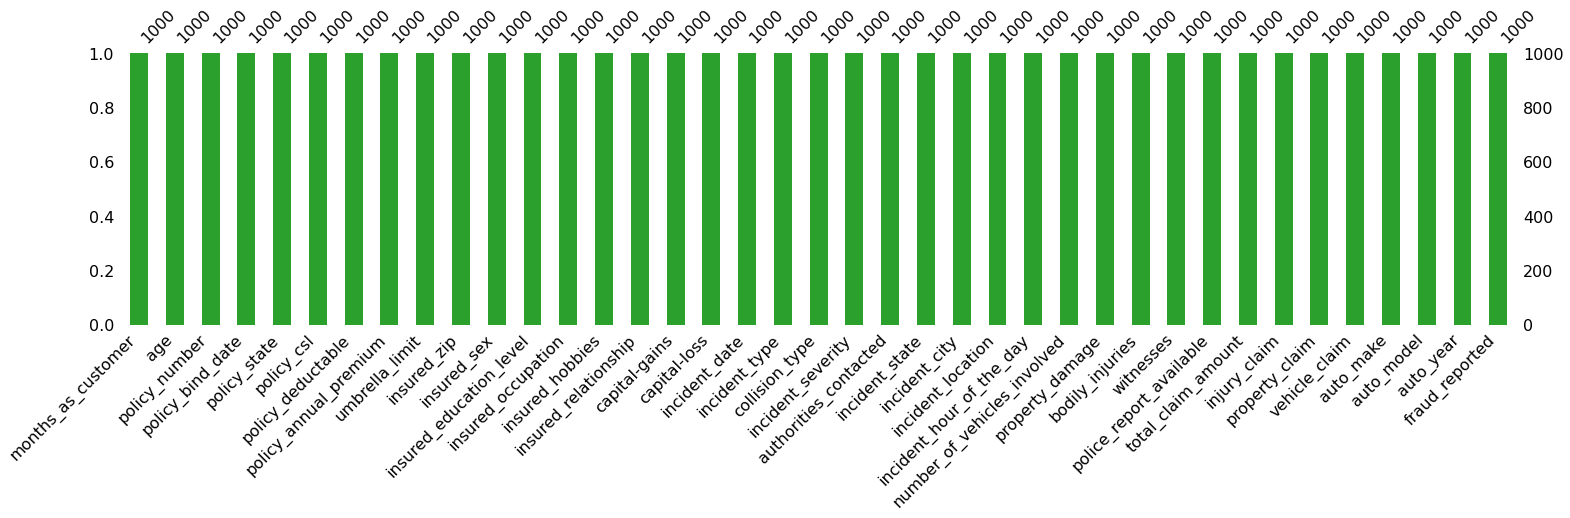

In [9]:
import missingno
missingno.bar(df, figsize = (25,5), color="tab:green")

we can see visually also there are no missing values

# Checking Unique Values

In [10]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

we can see the unique values and there are two columns which have 1000 unique values , which will not be of any help in prediction therefore it is best to drop it

In [11]:
df.drop(['policy_number','incident_location'],axis=1, inplace=True)

# DataFrame Description

In [12]:
df.describe()

months_as_customer          age  policy_deductable  \
count         1000.000000  1000.000000        1000.000000   
mean           203.954000    38.948000        1136.000000   
std            115.113174     9.140287         611.864673   
min              0.000000    19.000000         500.000000   
25%            115.750000    32.000000         500.000000   
50%            199.500000    38.000000        1000.000000   
75%            276.250000    44.000000        2000.000000   
max            479.000000    64.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

we can see from count again that there are no missing values

we can see that there are a lot of outliers present as the difference between the 25% quartile and max values is a lot. Similarly there are a lot of outliers in 50% quartiler also. Comparitively there are less outliers in 75% quartile

The describe function describes only the int and float values

Let us visually describe the dataframe with the help of a heat map

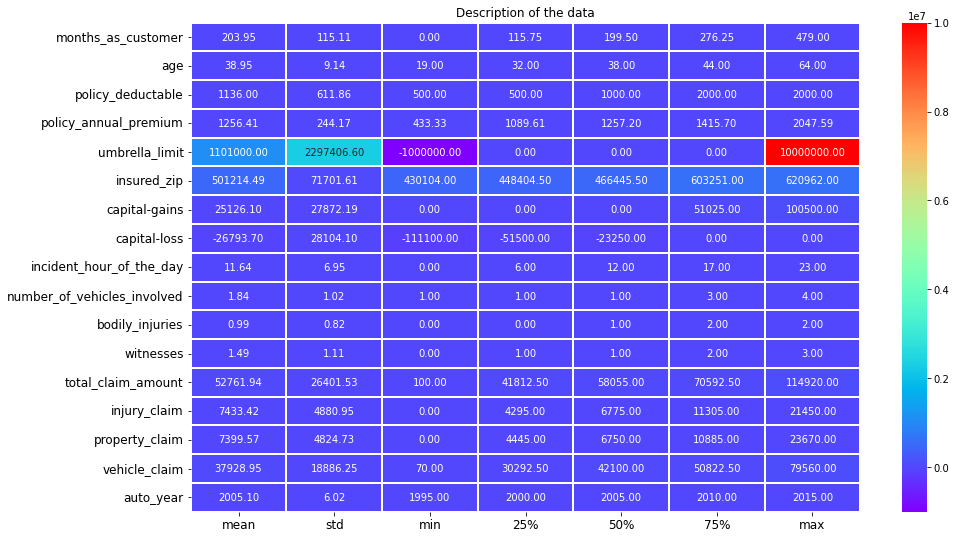

In [13]:
plt.figure(figsize = (15,9))
sns.heatmap(round(df.describe()[1:].transpose(),2), linewidth = 2, annot= True, fmt = ".2f", cmap="rainbow")
plt.title("Description of the data")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()


we can see high numerical values in the umberella limit

using the include all function in describe to display all the columns

In [14]:
df.describe(include='all').T

count unique                      top freq  \
months_as_customer           1000.0    NaN                      NaN  NaN   
age                          1000.0    NaN                      NaN  NaN   
policy_bind_date               1000    951               01-01-2006    3   
policy_state                   1000      3                       OH  352   
policy_csl                     1000      3                  250/500  351   
policy_deductable            1000.0    NaN                      NaN  NaN   
policy_annual_premium        1000.0    NaN                      NaN  NaN   
umbrella_limit               1000.0    NaN                      NaN  NaN   
insured_zip                  1000.0    NaN                      NaN  NaN   
insured_sex                    1000      2                   FEMALE  537   
insured_education_level        1000      7                       JD  161   
insured_occupation             1000     14        machine-op-inspct   93   
insured_hobbies                1000     20                  reading   64   
insured_relationship           1000      6                own-child  183   
capital-gains                1000.0    NaN                      NaN  NaN   
capital-loss                 1000.0    NaN                      NaN  NaN   
incident_date                  1000     60               02-02-2015   28   
incident_type                  1000      4  Multi-vehicle Collision  419   
collision_type                 1000      4           Rear Collision  292   
incident_severity              1000      4             Minor Damage  354   
authorities_contacted          1000      5                   Police  292   
incident_state                 1000      7                       NY  262   
incident_city                  1000      7              Springfield  157   
incident_hour_of_the_day     1000.0    NaN                      NaN  NaN   
number_of_vehicles_involved  1000.0    NaN                      NaN  NaN   
property_damage                1000      3                        ?  360   
bodily_injuries              1000.0    NaN                      NaN  NaN   
witnesses                    1000.0    NaN                      NaN  NaN   
police_report_available        1000      3                        ?  343   
total_claim_amount           1000.0    NaN                      NaN  NaN   
injury_claim                 1000.0    NaN                      NaN  NaN   
property_claim               1000.0    NaN                      NaN  NaN   
vehicle_claim                1000.0    NaN                      NaN  NaN   
auto_make                      1000     14                     Saab   80   
auto_model                     1000     39                      RAM   43   
auto_year                    1000.0    NaN                      NaN  NaN   
fraud_reported                 1000      2                        N  753   

                                   mean             std        min        25%  \
months_as_customer              203.954      115.113174        0.0     115.75   
age                              38.948        9.140287       19.0       32.0   
policy_bind_date                    NaN             NaN        NaN        NaN   
policy_state                        NaN             NaN        NaN        NaN   
policy_csl                          NaN             NaN        NaN        NaN   
policy_deductable                1136.0      611.864673      500.0      500.0   
policy_annual_premium        1256.40615      244.167395     433.33  1089.6075   
umbrella_limit                1101000.0  2297406.598118 -1000000.0        0.0   
insured_zip                  501214.488    71701.610941   430104.0   448404.5   
insured_sex                         NaN             NaN        NaN        NaN   
insured_education_level             NaN             NaN        NaN        NaN   
insured_occupation                  NaN             NaN        NaN        NaN   
insured_hobbies                     NaN             NaN        NaN        NaN   
insured

This dataframe consists of data related to the insurance claim after a road accident and other details like the customer details, the time, damages injuries, about the policy

Feature columns

1)Company's data for insurance claim policy : months_as_customer, age, policy_number(dropped), policy_bind_date, policy_csl, policy_deductable, policy_annual_premium, umbrella_limit
2)Personal details of the customers : insured_zip, insured_sex, insured_education_level, insured_occupation, insured_hobbies, insured_relationship, capital- gains, capital-loss.
3)Details of the incident: incident_date, incident_type, collision_type, incident_severity, authorities_contacted, incident_state, incident_city, incident_location(dropped), incident_hour_of_the_day, number_of_vehicles_involved, property_damage, bodily_injuries, witnesses, police_report_available, total_amount_claimed, injury_claim, property_claim, vehicle_claim, auto_make, auto_model, auto_year

Target Columns

fraud_reported : Y-YES / N-NO

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

we see that we have a lot of columns that are of object data type , we will have to take care of this

In [16]:
df.info

<bound method DataFrame.info of      months_as_customer  age policy_bind_date policy_state policy_csl  \
0                   328   48       17-10-2014           OH    250/500   
1                   228   42       27-06-2006           IN    250/500   
2                   134   29       06-09-2000           OH    100/300   
3                   256   41       25-05-1990           IL    250/500   
4                   228   44       06-06-2014           IL   500/1000   
..                  ...  ...              ...          ...        ...   
995                   3   38       16-07-1991           OH   500/1000   
996                 285   41       05-01-2014           IL    100/300   
997                 130   34       17-02-2003           OH    250/500   
998                 458   62       18-11-2011           IL   500/1000   
999                 456   60       11-11-1996           OH    250/500   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0            

from the above info function we can see that that some columns collision_type,property_damage and police_report_available have rows that are filled with ? data . We will have to give them some meaningful names

Let us make seperate lists for object datatype and number datatype

In [17]:
# getting list of all object data type column names
obj_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'O':
        obj_datatype.append(x)
print(f"Object Data Type Columns are:\n ",obj_datatype)

# getting the list of all numeric data type column names
num_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        num_datatype.append(x)
print(f"\nNumber Data Type Columns are:\n ",num_datatype)

Object Data Type Columns are:
  ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']

Number Data Type Columns are:
  ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


# Data Pre Processing

Let us seperate the policy_bind_date column into seperate day month and year

In [18]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['policy_bind_Day'] = df['policy_bind_date'].apply(lambda x:x.day)
df['policy_bind_Month'] = df['policy_bind_date'].apply(lambda x:x.month)
df['policy_bind_Year'] = df['policy_bind_date'].apply(lambda x:x.year)

Seperating the incident_date column in seperate day, month and year columns

In [19]:
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['incident_Day'] = df['incident_date'].apply(lambda x:x.day)
df['incident_Month'] = df['incident_date'].apply(lambda x:x.month)
df['incident_Year'] = df['incident_date'].apply(lambda x:x.year)

dropping the policy_bind_date and incident_date columns

In [20]:
df.drop(columns = ['policy_bind_date','incident_date'], axis=1,inplace=True)

Now, let us replace the ? values in columns collision_type,property_damage and police_report_available with some meaningful name

In [21]:
df['collision_type'] = df['collision_type'].replace('?', 'unknown')
df['property_damage'] = df['property_damage'].replace('?', 'unknown')
df['police_report_available'] = df['police_report_available'].replace('?', 'unknown')

Let us again check the unique values after seperating the columns

In [22]:
df.nunique()

months_as_customer             391
age                             46
policy_state                     3
policy_csl                       3
policy_deductable                3
policy_annual_premium          991
umbrella_limit                  11
insured_zip                    995
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_hobbies                 20
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_type                    4
collision_type                   4
incident_severity                4
authorities_contacted            5
incident_state                   7
incident_city                    7
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  3
bodily_injuries                  3
witnesses                        4
police_report_available          3
total_claim_amount             763
injury_claim        

we can see that the column incident year has only 1 unique value . We can drop this column as it will no help in our predicton

In [23]:
df.drop("incident_Year", axis=1, inplace=True)

# Visualization

Countplot for columns with 2 digit values

 column name: umbrella_limit


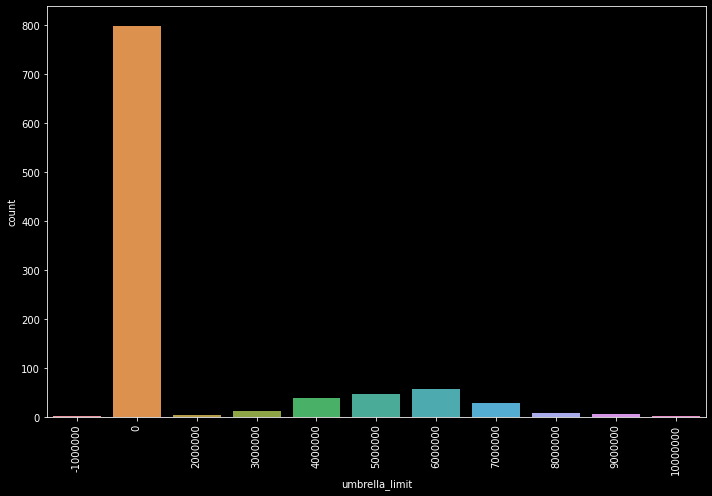

 column name: insured_occupation


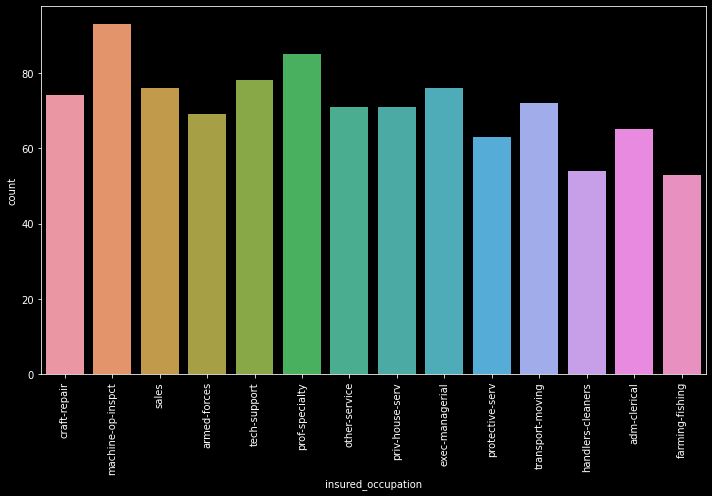

 column name: auto_make


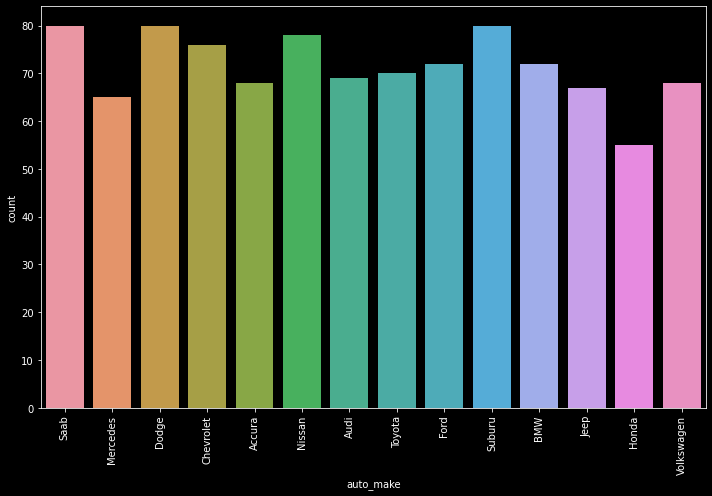

 column name: insured_hobbies


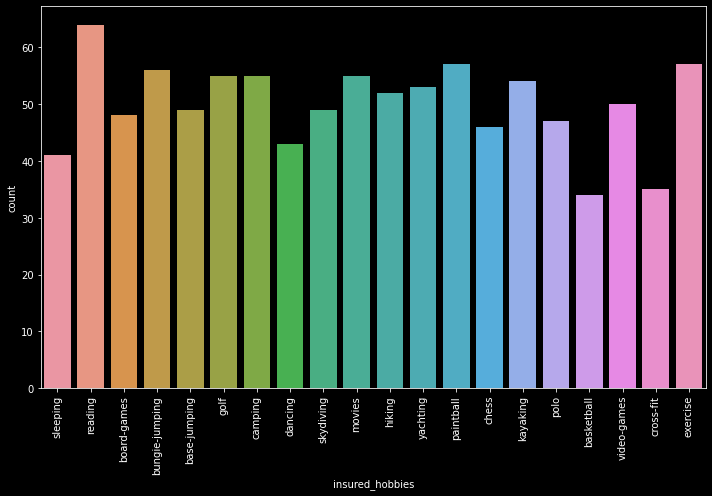

 column name: auto_model


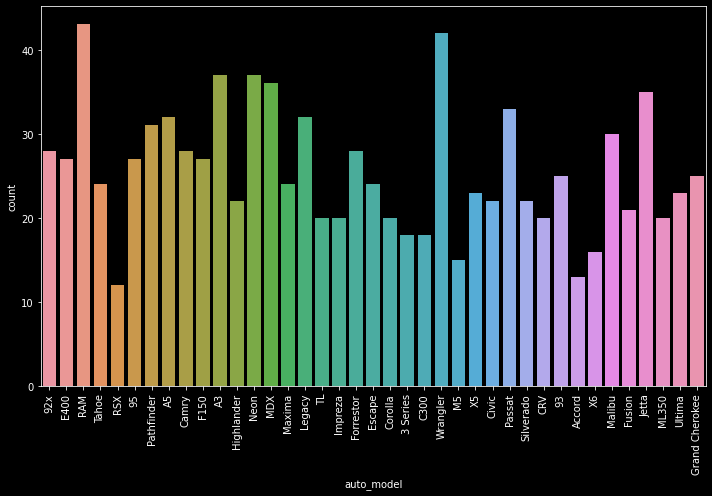

In [24]:
def count_plot(x):
    plt.style.use('dark_background')
    plt.figure(figsize=(10,7))
    sns.countplot(x)
    plt.xticks(rotation=90)
    plt.tight_layout()
    return plt.show()

double_digit_col = ['umbrella_limit', 'insured_occupation', 'auto_make', 'insured_hobbies', 'auto_model']

for j in df[double_digit_col]:
    print(f" column name:", j)
    count_plot(df[j])

The umberella limit is the maximum for umberella limit 0

The insured occupation is highest for machine operations inspector and prof-speciality and least for adm clerical and farming-fishing

The insurance claim for The automobile make Saab, Dodge ,Nissan , Suburu is the highest. The insurance is least claimed for Honda

The insured hobbie is highest for reading and least for basketball

The insurance claim for automobile models RAM, and jeep wrangler is the highest. The insurance is least claimed for RSX


PIE Chart for columns with single digit values

Column name: fraud_reported


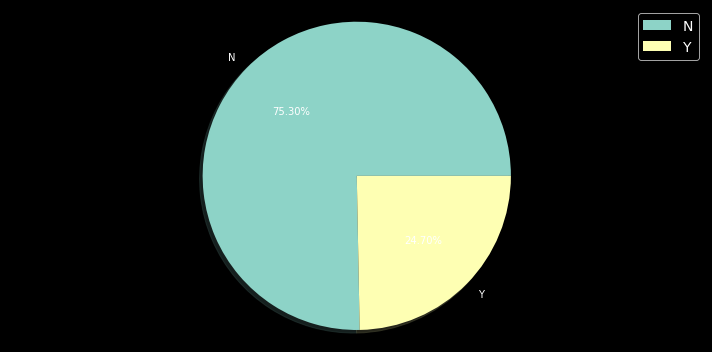

Column name: insured_sex


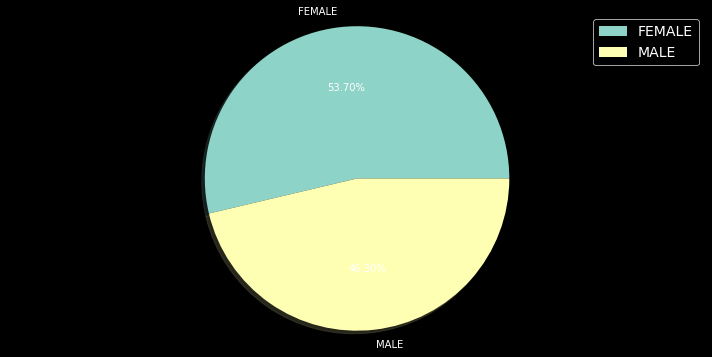

Column name: policy_state


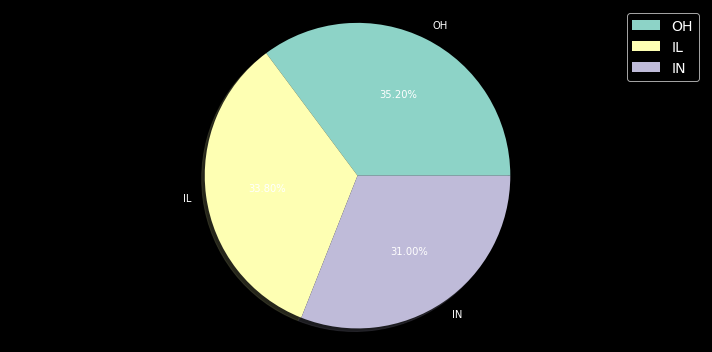

Column name: policy_csl


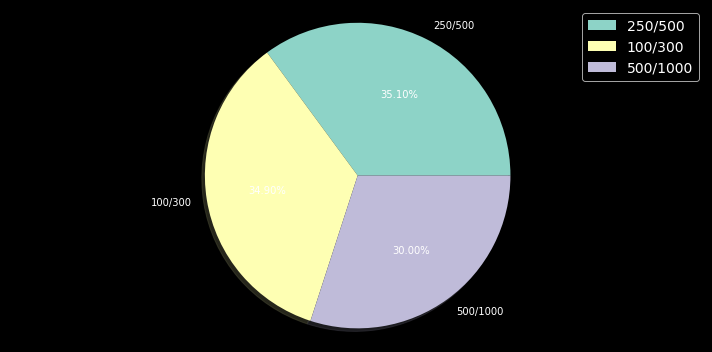

Column name: policy_deductable


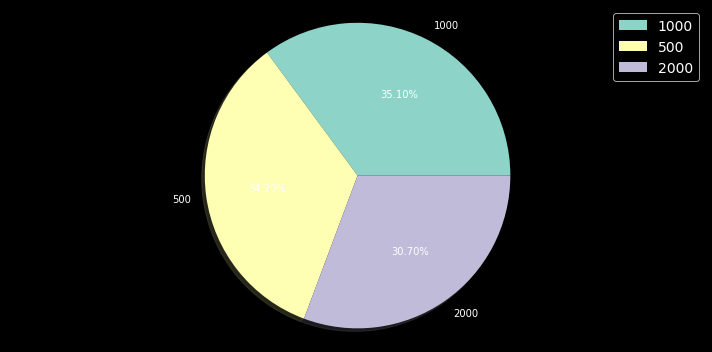

Column name: bodily_injuries


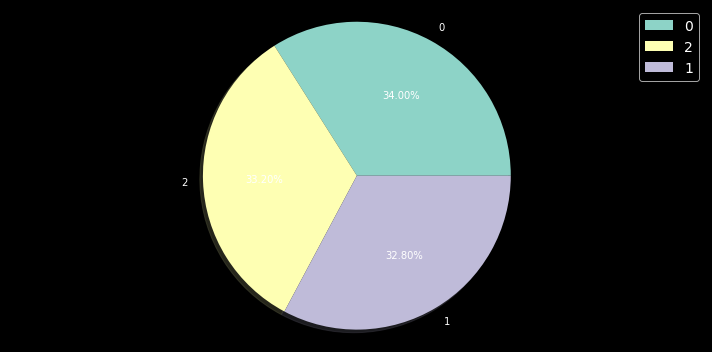

Column name: police_report_available


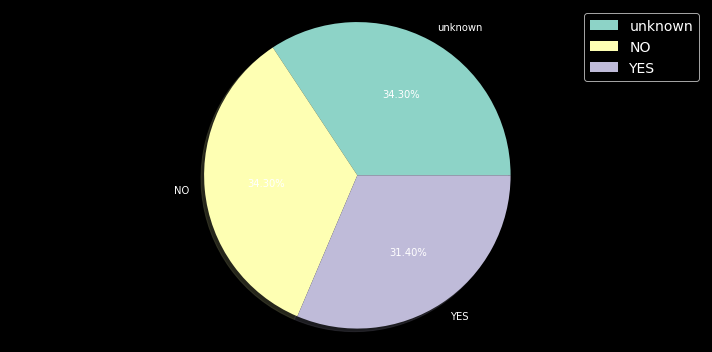

Column name: property_damage


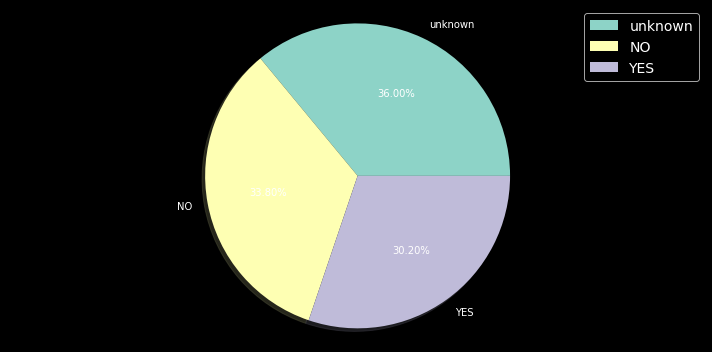

Column name: incident_type


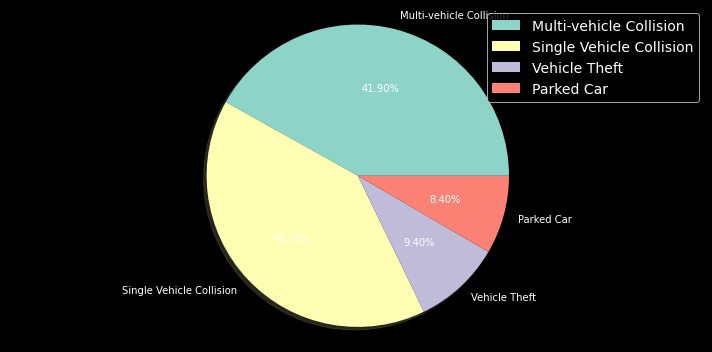

Column name: collision_type


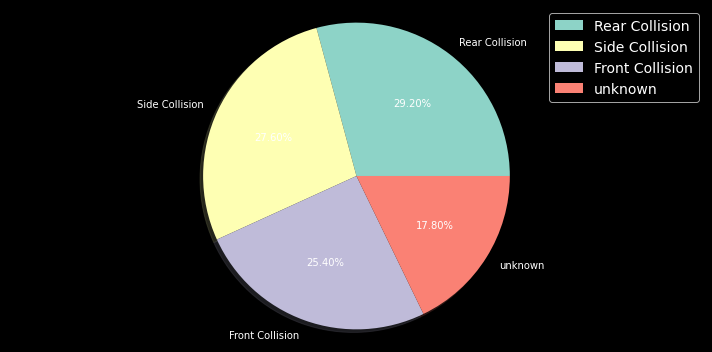

Column name: incident_severity


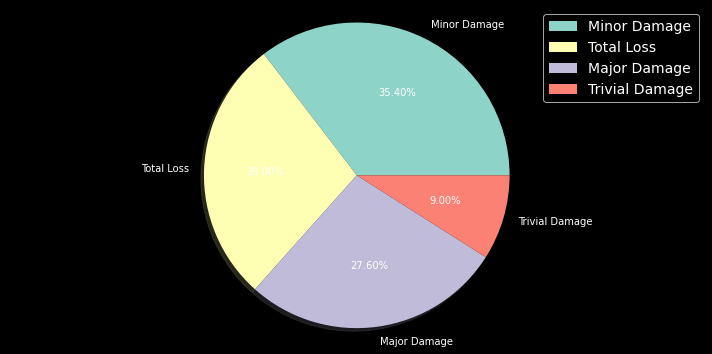

Column name: number_of_vehicles_involved


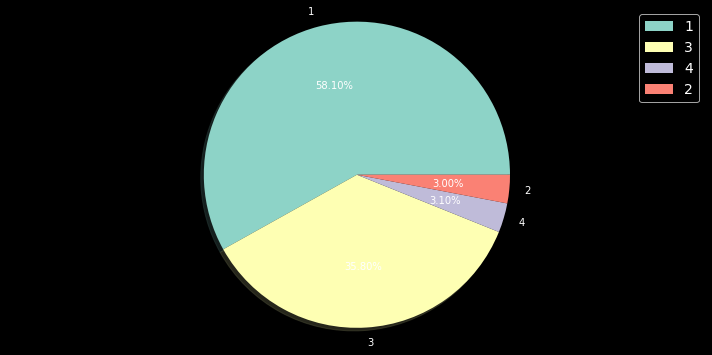

Column name: witnesses


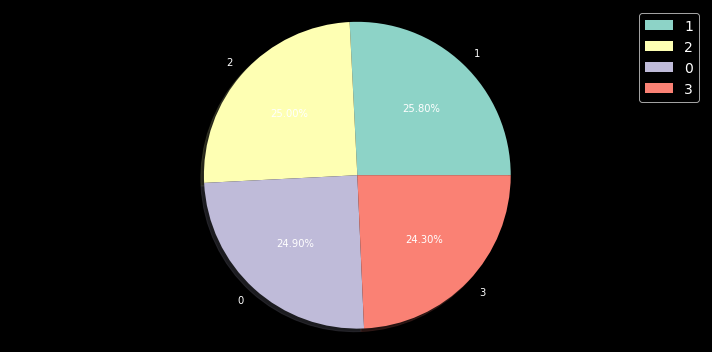

Column name: authorities_contacted


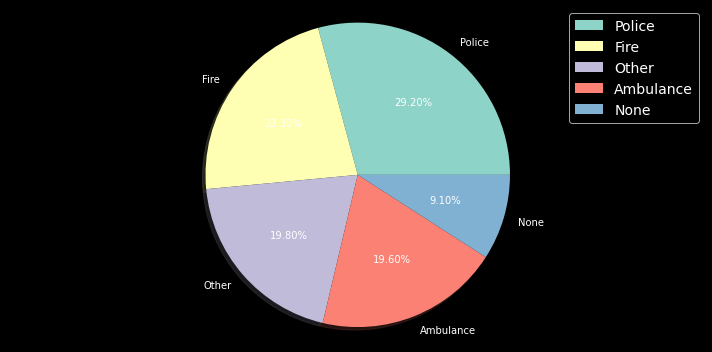

Column name: insured_relationship


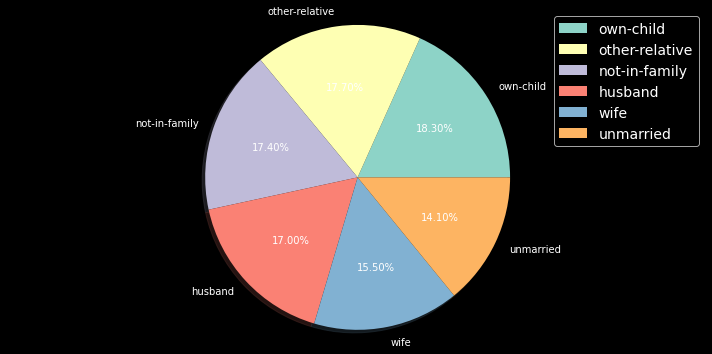

Column name: insured_education_level


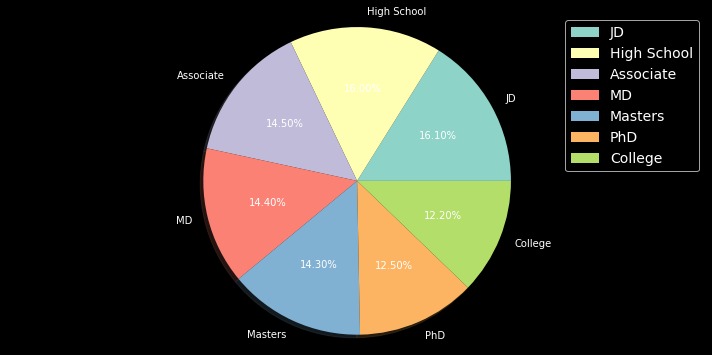

Column name: incident_state


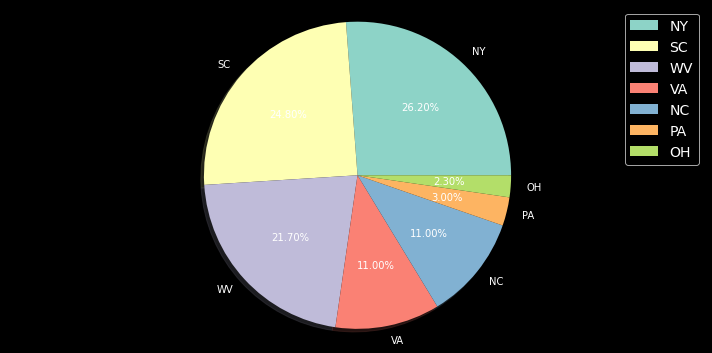

Column name: incident_city


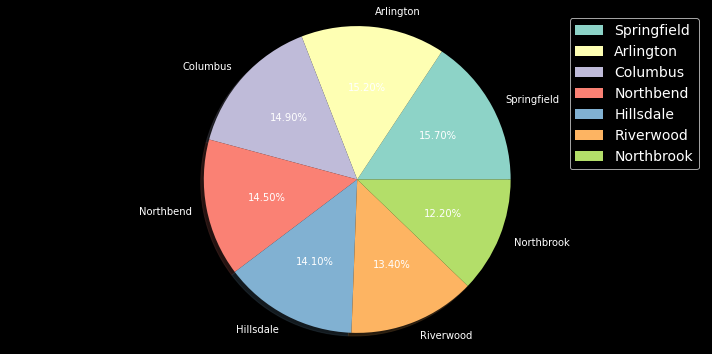

In [25]:
def pie_chart(x):
    plt.figure(figsize=(10,5))
    plt.pie(x.value_counts(), labels=x.value_counts().index, shadow=True, autopct='%1.2f%%')
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()

single_digit_col = ['fraud_reported', 'insured_sex', 'policy_state', 'policy_csl', 'policy_deductable', 'bodily_injuries',
        'police_report_available', 'property_damage', 'incident_type', 'collision_type', 'incident_severity',
        'number_of_vehicles_involved', 'witnesses', 'authorities_contacted', 'insured_relationship',
        'insured_education_level', 'incident_state', 'incident_city']

for i in df[single_digit_col]:
    print(f"Column name:", i)
    pie_chart(df[i])

we see that no fraud reported is more than the fraud reported, since frauyd reported is our target variable we will habe balance this data using Smote

There ratio is almost equal between the males and females who have insurance, but the females is slightly more

The insurance policy state is almost same for all , ohio, illinois and india are almost equally distributed. Ohio has slightly more distributed data

The policy combined slngle limits is also almost equally distributed. 500/1000 is lesser compared to the other two

We see that the policy deductable, the amount the policy holder has to pay before the insurance company pays, is most for 1000 and least for 2000

we observe that the bodily injuries is least for 1 and most for 0 . All three are almost equally distributed

we see that the police report is not available and if it's unknown is the same, the police report is available but less compared to the other two

We see that whether there was property damage or not or if it is unkown is almost equally distributed, but the data for property damage is lesser compared to the other two

we can see that the insurance claim is the most for incident type when there is a multiple car collision and then for single car collision and least forParked car collision

we observe that most of the collision are from the back , that is rear collision and the least collision type is unknown

we see that the severity of the incident results in minor damages the most and least in trivial damages

we observe that in most collisions 3 cars are involved and then a single car

We see that the data for witnesses is equal distributed for 1,2,3and 4 witnessess

The most contacted authority after a collision is the police and then the fire department

The insured relationship is almost equally distributed for all the categories. It is the most for own child and least for unmarried

The insured education level is the highest for JD and least college people. The data is almost equally distributed

We see that NewYork NY has highest incidents and the least incidents happen in ohio

We can say that the data for the incident city is almost equally distributed but is the most in Arlington and least in Northbrook

Line plot for all features with target variable

insured_sex vs fraud_reported column ->


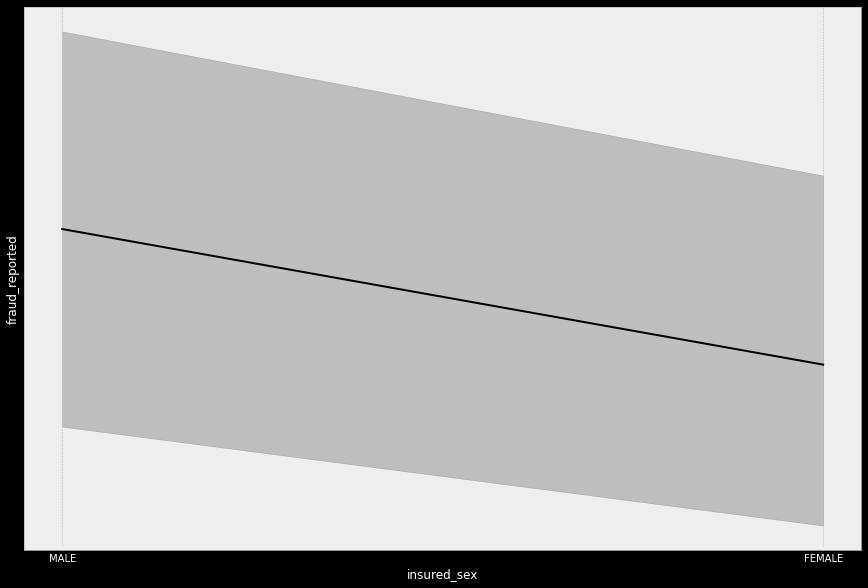

policy_state vs fraud_reported column ->


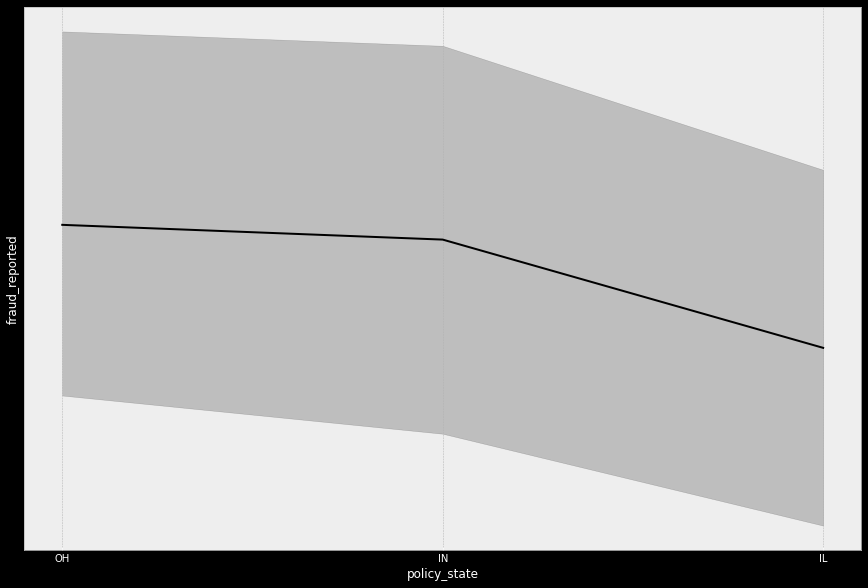

policy_csl vs fraud_reported column ->


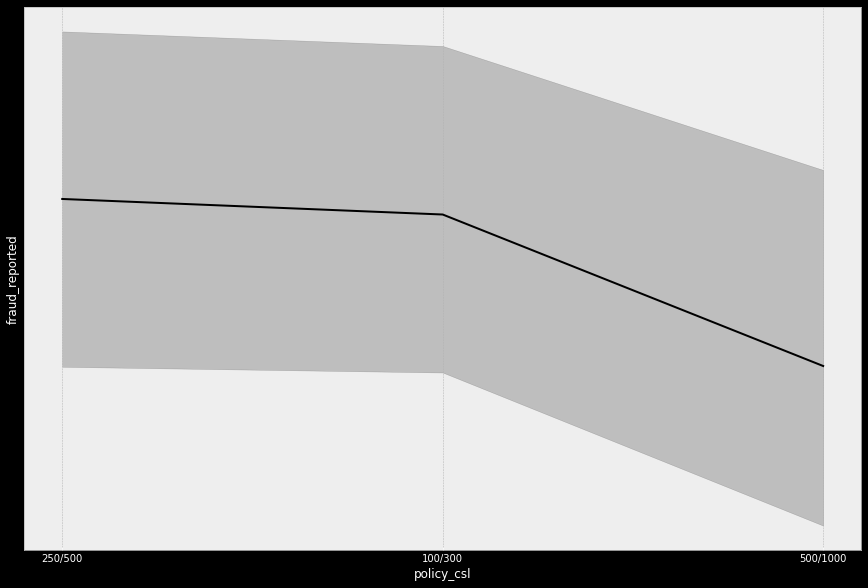

policy_deductable vs fraud_reported column ->


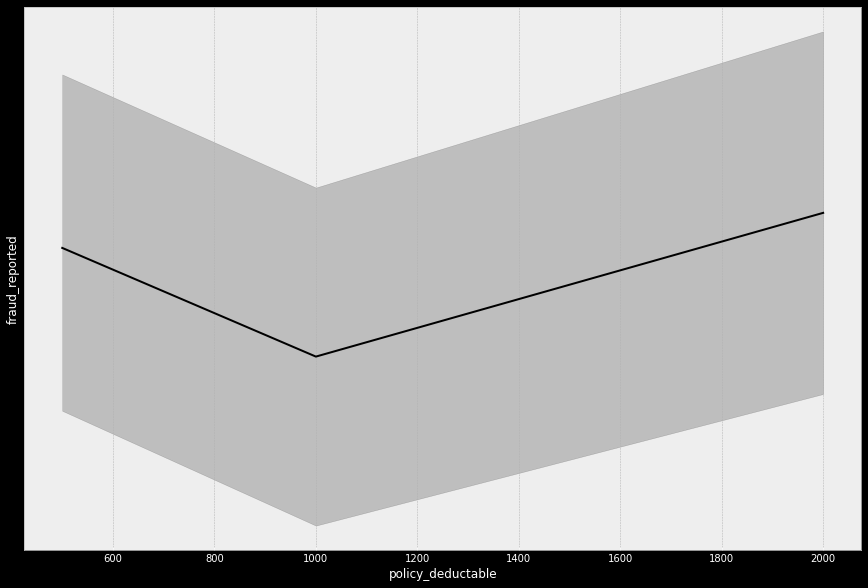

bodily_injuries vs fraud_reported column ->


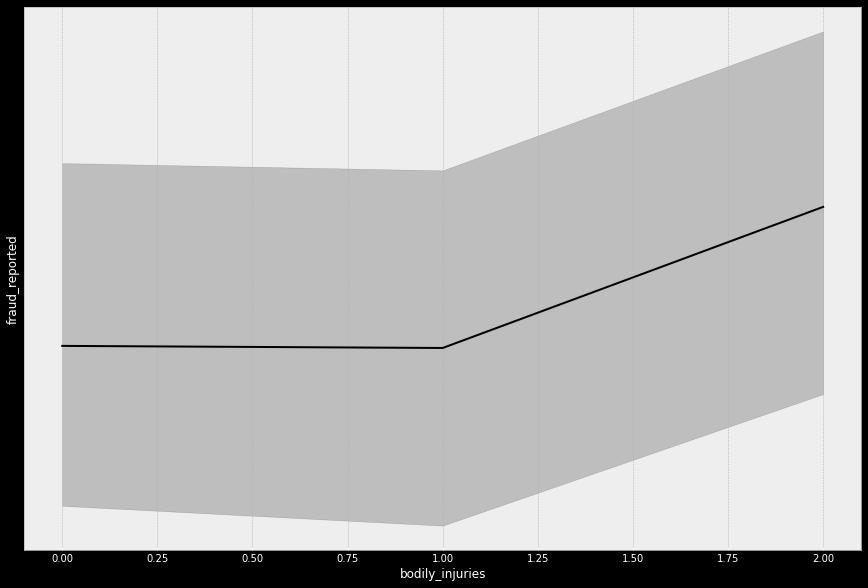

police_report_available vs fraud_reported column ->


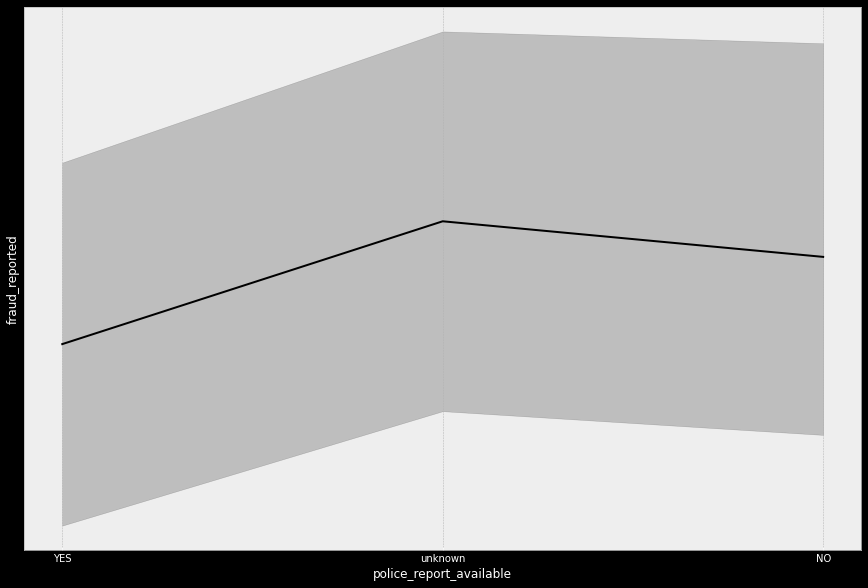

property_damage vs fraud_reported column ->


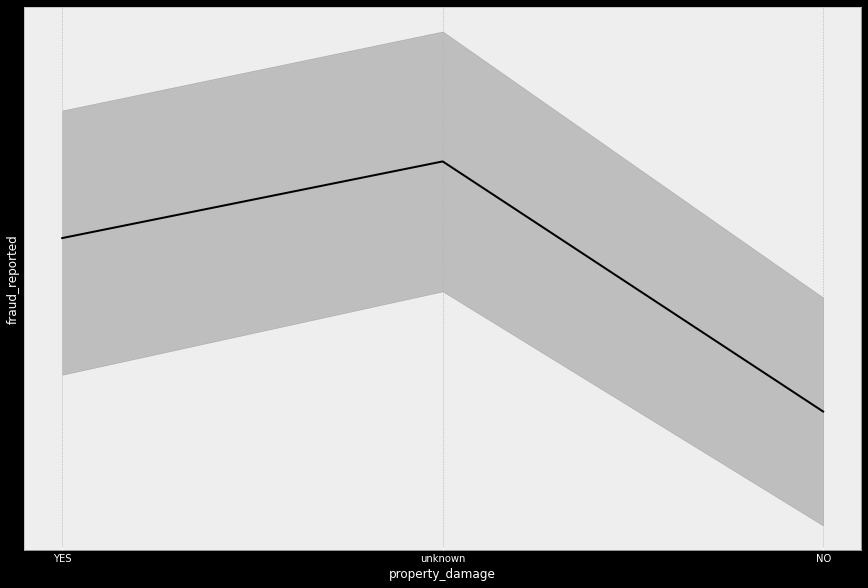

incident_type vs fraud_reported column ->


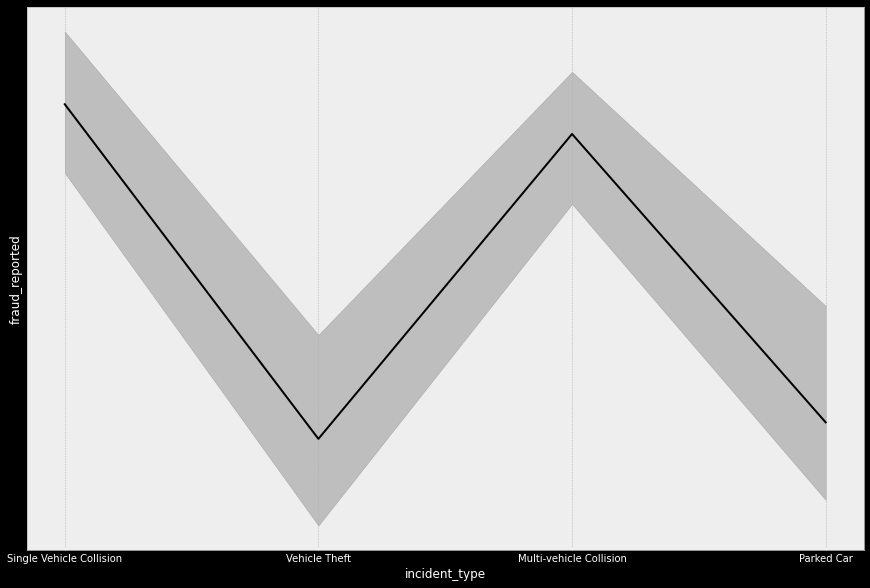

collision_type vs fraud_reported column ->


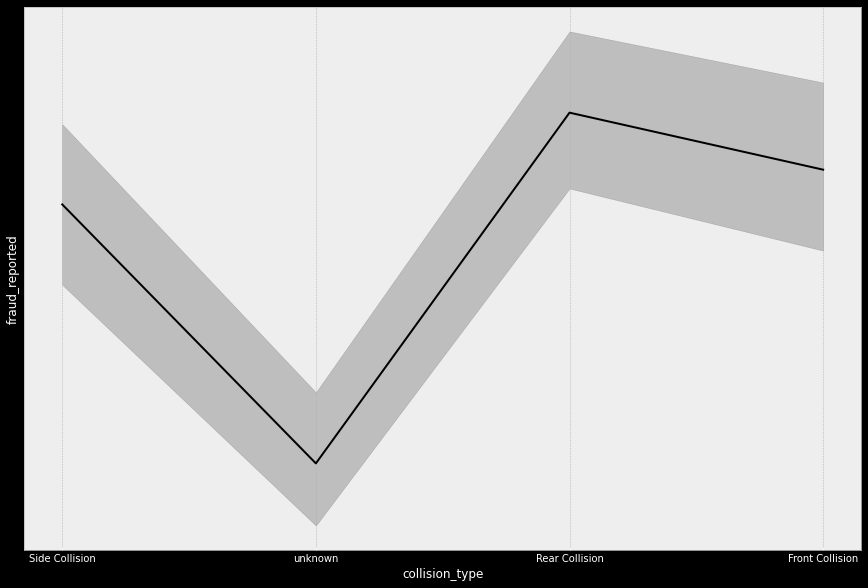

incident_severity vs fraud_reported column ->


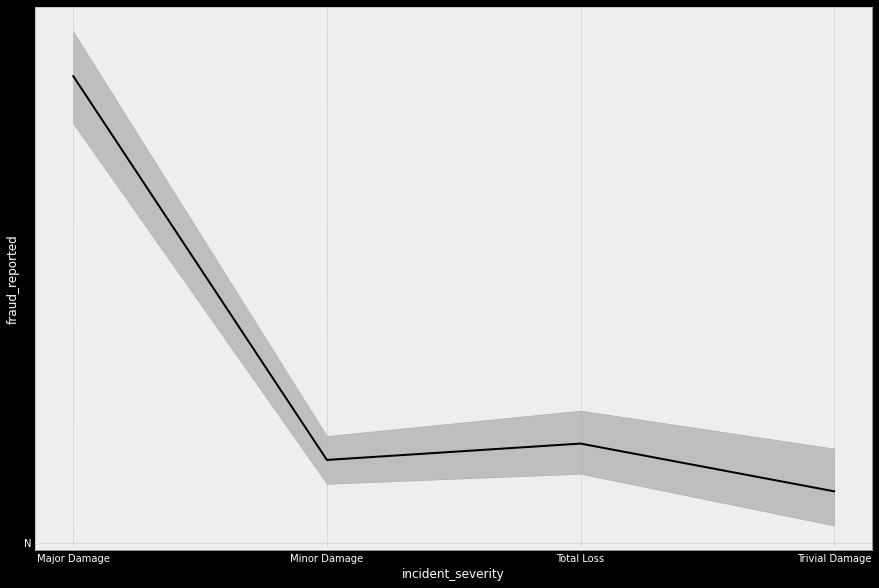

number_of_vehicles_involved vs fraud_reported column ->


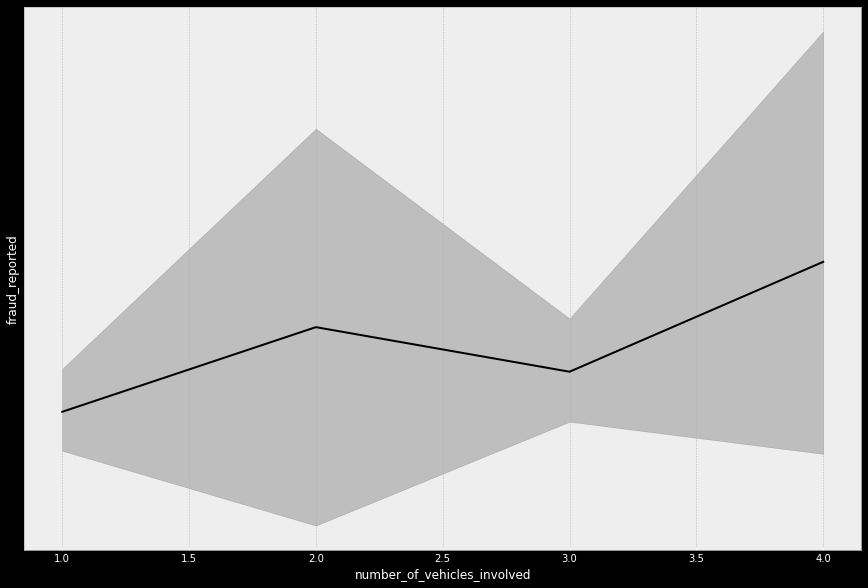

witnesses vs fraud_reported column ->


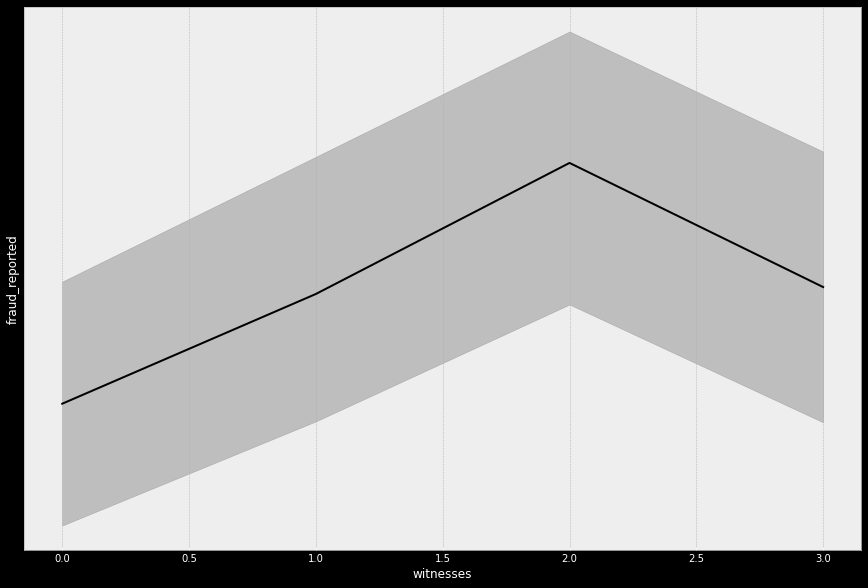

authorities_contacted vs fraud_reported column ->


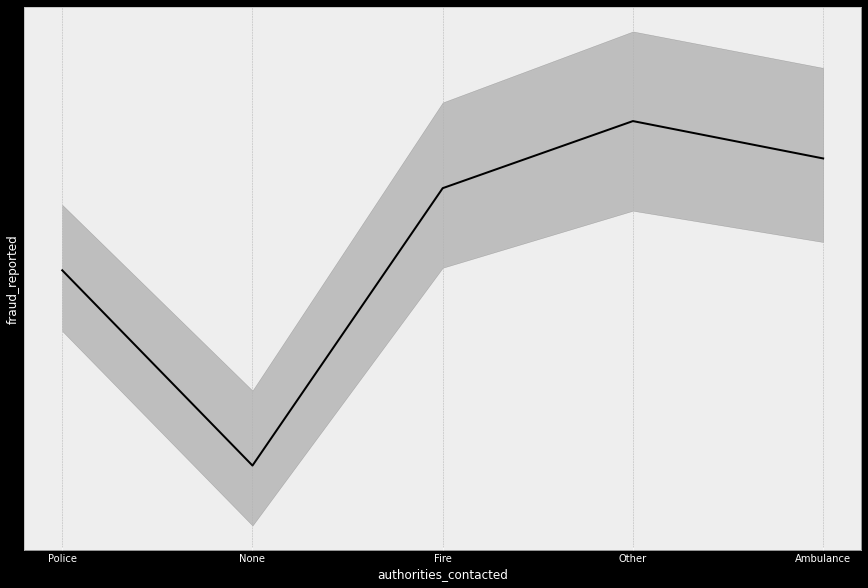

insured_relationship vs fraud_reported column ->


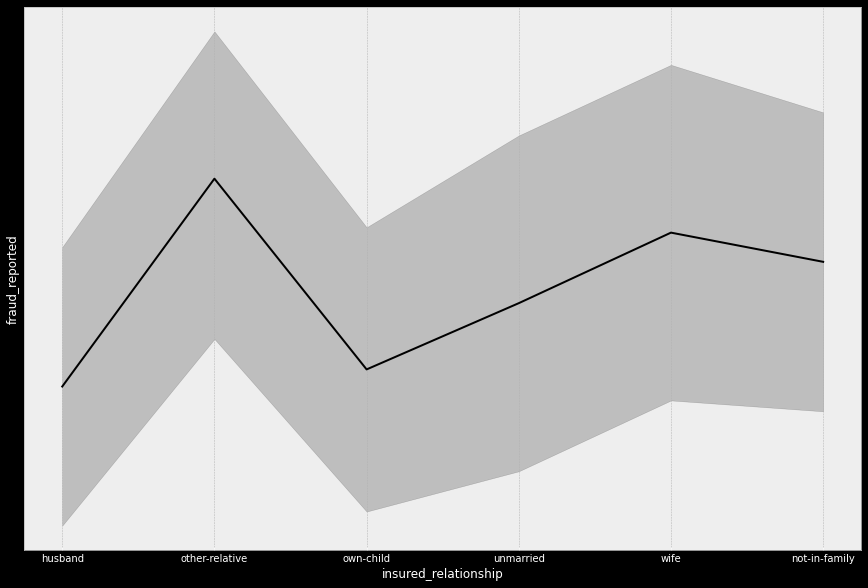

insured_education_level vs fraud_reported column ->


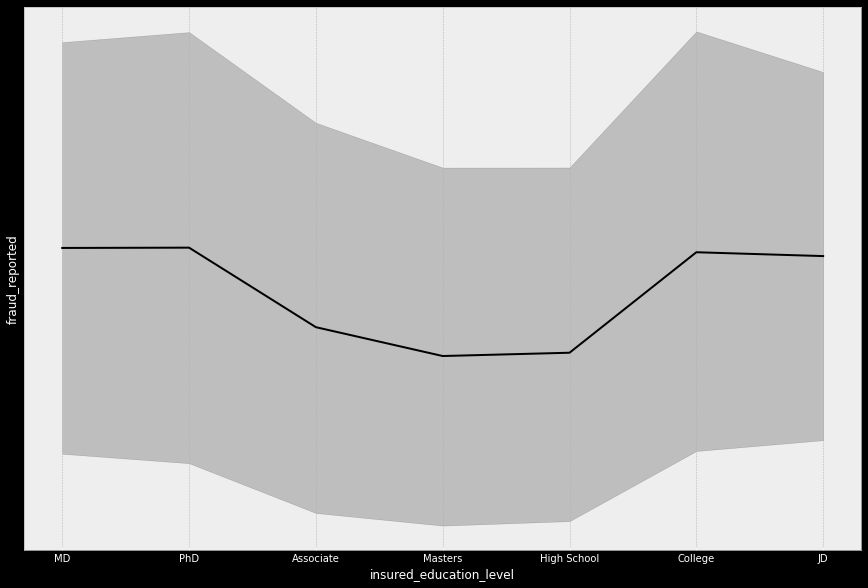

incident_state vs fraud_reported column ->


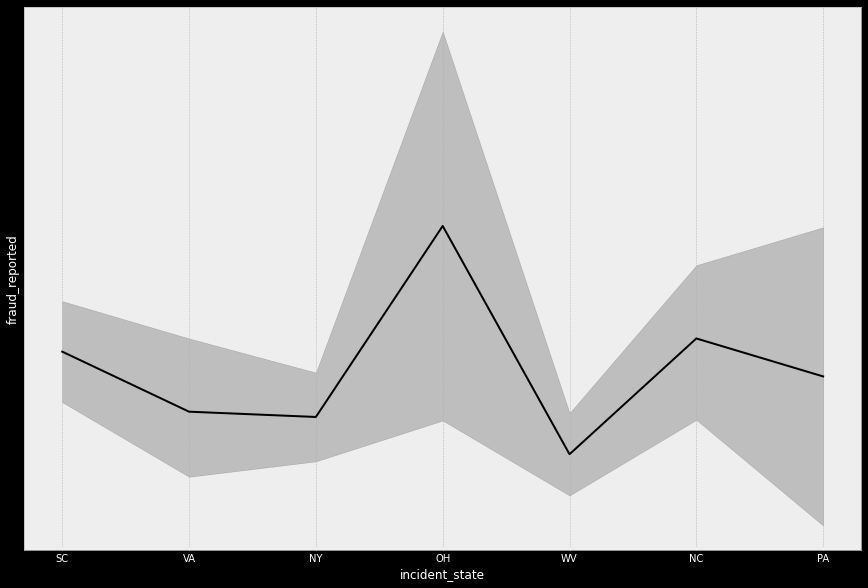

incident_city vs fraud_reported column ->


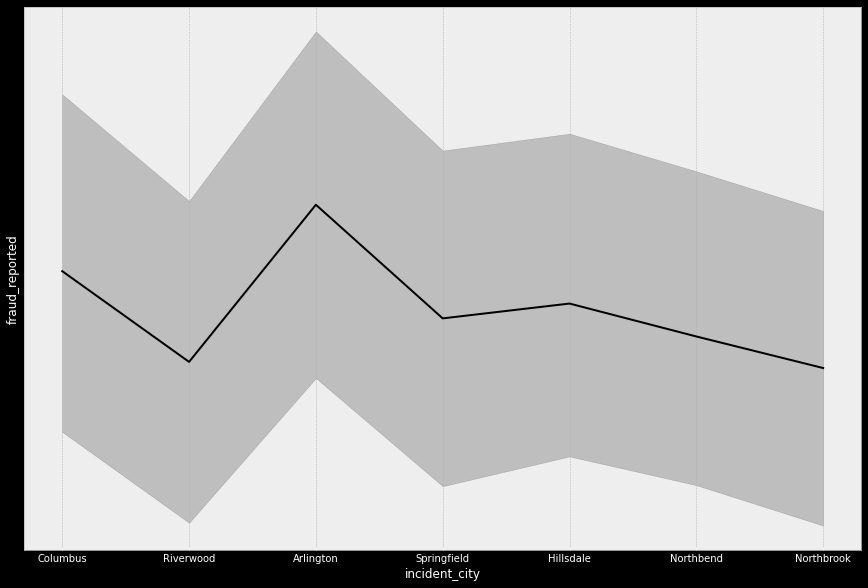

umbrella_limit vs fraud_reported column ->


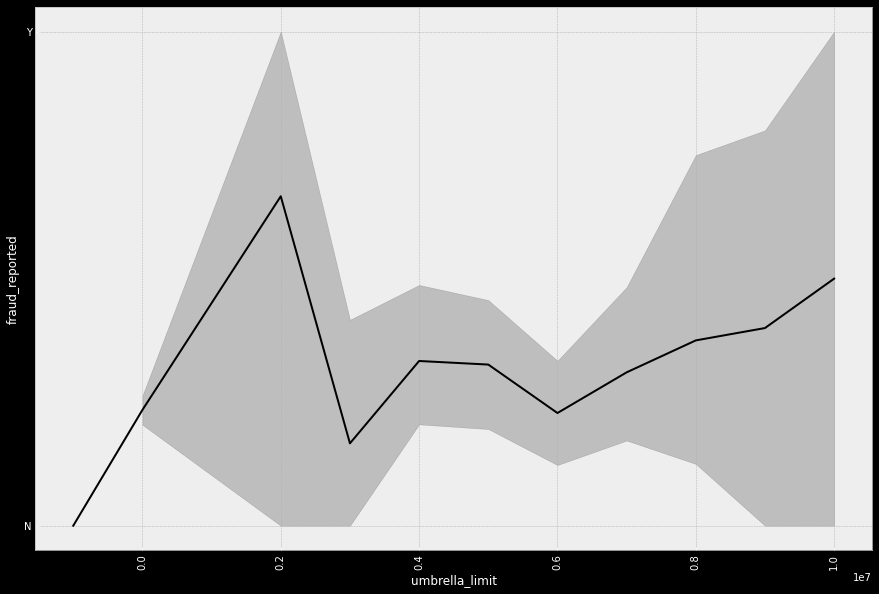

insured_occupation vs fraud_reported column ->


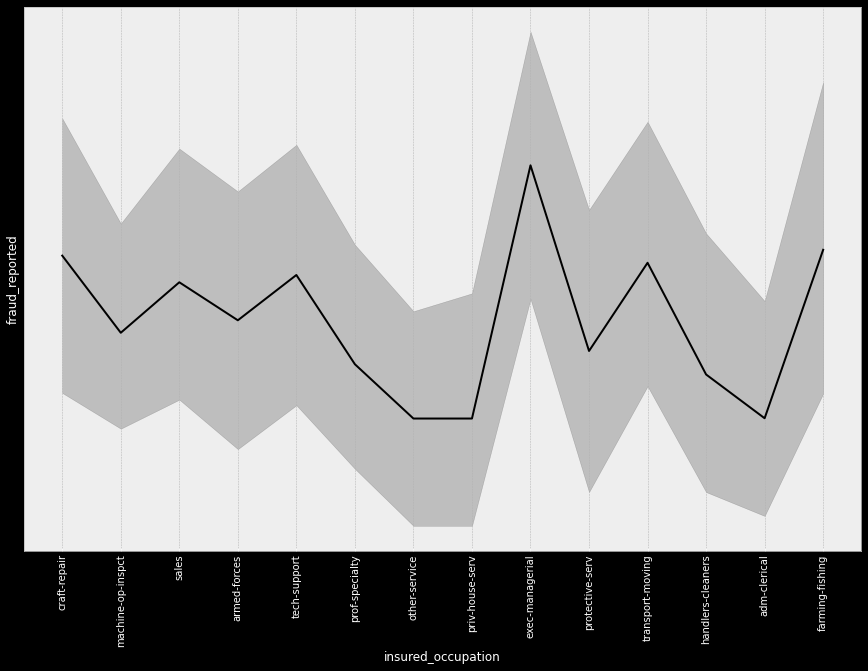

auto_make vs fraud_reported column ->


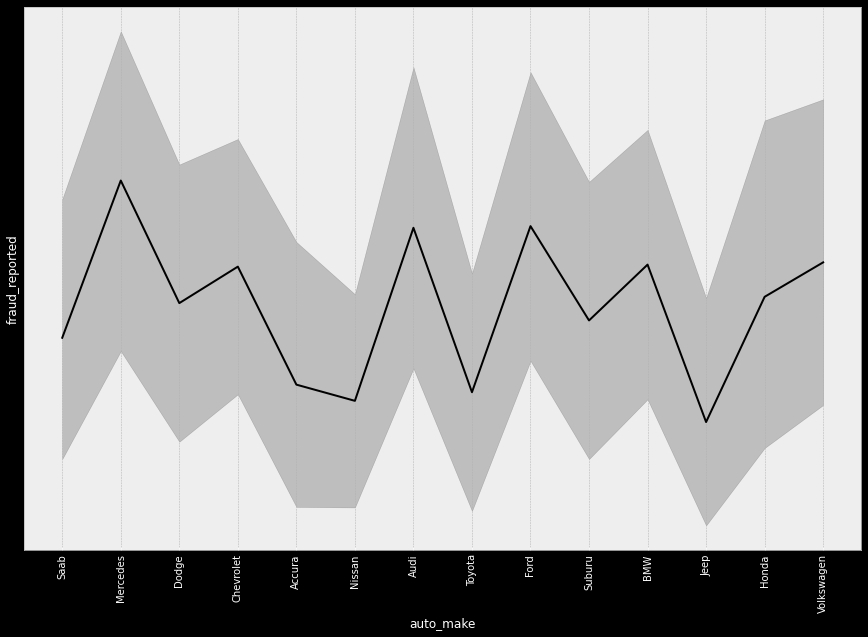

insured_hobbies vs fraud_reported column ->


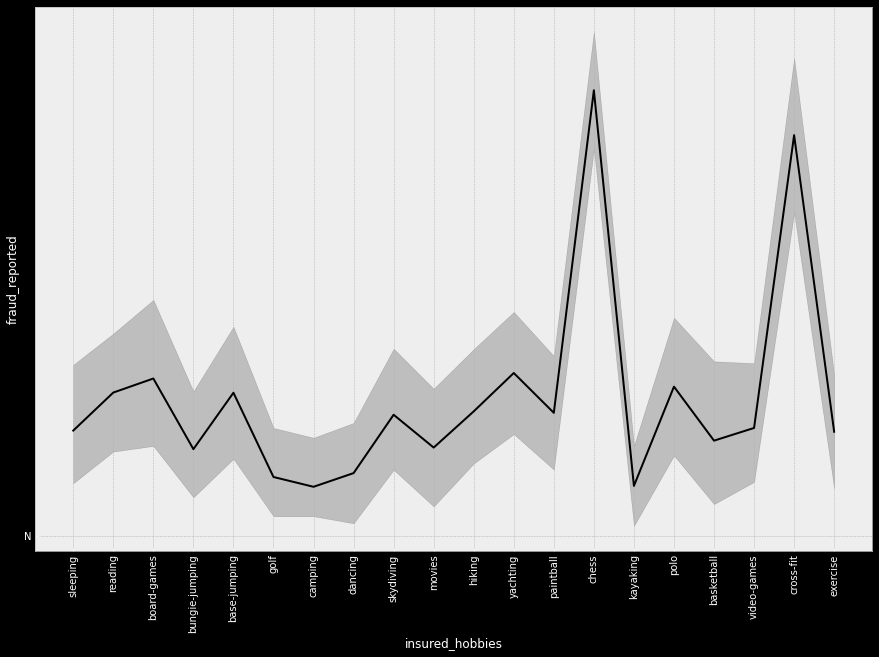

auto_model vs fraud_reported column ->


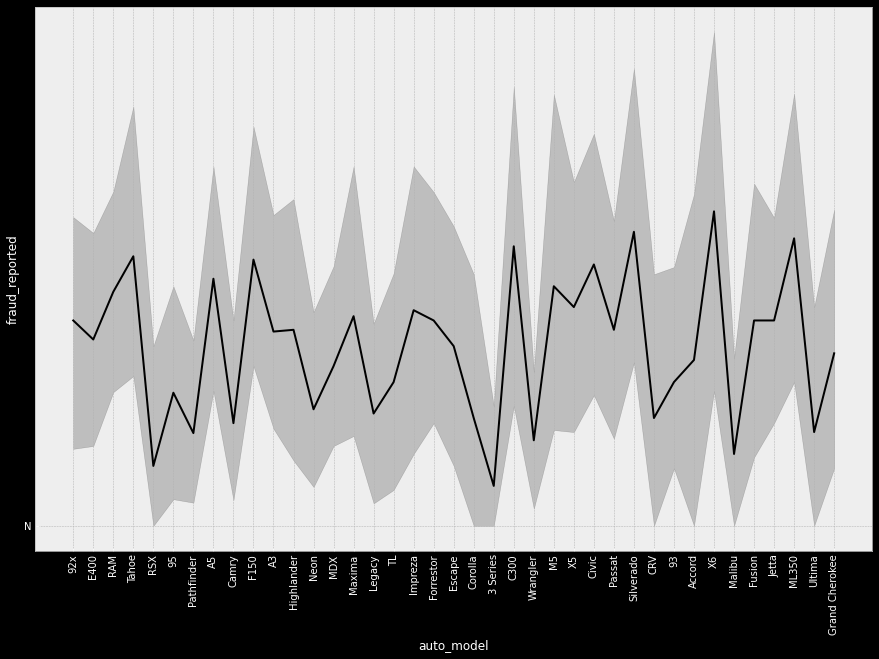

In [26]:

plt.style.use('bmh')

single_digit_col.remove("fraud_reported")

for k in df[single_digit_col]:
    plt.figure(figsize=(15,10))
    print(f"{k} vs fraud_reported column ->")
    
    sns.lineplot(x=df[k],y='fraud_reported',data=df,color='black' )
    plt.show()
    
for l in df[double_digit_col]:
    plt.figure(figsize=(15,10))
    print(f"{l} vs fraud_reported column ->")
    sns.lineplot(x=df[l],y='fraud_reported',data=df ,color='black')
    plt.xticks(rotation=90)
    plt.show()

I have plotted the line plot for all features with the target fraud_predicition

# Encoding

Ordinal Encoding

In [27]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df.head()

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                 328   48           2.0         1.0               1000   
1                 228   42           1.0         1.0               2000   
2                 134   29           2.0         0.0               2000   
3                 256   41           0.0         1.0               2000   
4                 228   44           0.0         2.0               1000   

   policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                1406.91               0       466132          1.0   
1                1197.22         5000000       468176          1.0   
2                1413.14         5000000       430632          0.0   
3                1415.74         6000000       608117          0.0   
4                1583.91         6000000       610706          1.0   

   insured_education_level  insured_occupation  insured_hobbies  \
0                      4.0                 2.0             17.0   
1                      4.0                 6.0             15.0   
2                      6.0                11.0              2.0   
3                      6.0                 1.0              2.0   
4                      0.0                11.0              2.0   

   insured_relationship  capital-gains  capital-loss  incident_type  \
0                   0.0          53300             0            2.0   
1                   2.0              0             0            3.0   
2                   3.0          35100             0            0.0   
3                   4.0          48900        -62400            2.0   
4                   4.0          66000        -46000            3.0   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0             2.0                0.0                    4.0             4.0   
1             3.0                1.0                    4.0             5.0   
2             1.0                1.0                    4.0             1.0   
3             0.0                0.0                    4.0             2.0   
4             3.0                1.0                    2.0             1.0   

   incident_city  incident_hour_of_the_day  number_of_vehicles_involved  \
0            1.0                         5                            1   
1            5.0                         8                            1   
2            1.0                         7                            3   
3            0.0                         5                            1   
4            0.0                        20                            1   

   property_damage  bodily_injuries  witnesses  police_report_available  \
0              1.0                1          2                      1.0   
1              2.0                0          0                      2.0   
2              0.0                2          3                      0.0   
3              2.0                1          2                      0.0   
4              0.0                0          1                      0.0   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0               71610          6510           13020          52080       10.0   
1                5070           780             780           3510        8.0   
2               34650          7700            3850          23100        4.0   
3               63400          6340            6340          50720        3.0   
4                6500          1300             650           4550        0.0   

   auto_model  auto_year  fraud_reported  policy_bind_Day  policy_bind_Month  \
0         1.0       2004             1.0               17                 10   
1        12.0       2007             1.0               27                  6   
2        30.0       2007             0.0                9                  6   
3        34.0       2014             1.0               25                  5   
4        31.0       2009             

Label Encoding

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["fraud_reported"] = le.fit_transform(df["fraud_reported"])
df.head()

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                 328   48           2.0         1.0               1000   
1                 228   42           1.0         1.0               2000   
2                 134   29           2.0         0.0               2000   
3                 256   41           0.0         1.0               2000   
4                 228   44           0.0         2.0               1000   

   policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                1406.91        0.000000    13.052226          1.0   
1                1197.22       15.424949    13.056602          1.0   
2                1413.14       15.424949    12.973011          0.0   
3                1415.74       15.607270    13.318124          0.0   
4                1583.91       15.607270    13.322373          1.0   

   insured_education_level  insured_occupation  insured_hobbies  \
0                      4.0                 2.0             17.0   
1                      4.0                 6.0             15.0   
2                      6.0                11.0              2.0   
3                      6.0                 1.0              2.0   
4                      0.0                11.0              2.0   

   insured_relationship  capital-gains  capital-loss  incident_type  \
0                   0.0          53300             0            2.0   
1                   2.0              0             0            3.0   
2                   3.0          35100             0            0.0   
3                   4.0          48900        -62400            2.0   
4                   4.0          66000        -46000            3.0   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0             2.0                0.0                    4.0             4.0   
1             3.0                1.0                    4.0             5.0   
2             1.0                1.0                    4.0             1.0   
3             0.0                0.0                    4.0             2.0   
4             3.0                1.0                    2.0             1.0   

   incident_city  incident_hour_of_the_day  number_of_vehicles_involved  \
0            1.0                         5                            1   
1            5.0                         8                            1   
2            1.0                         7                            3   
3            0.0                         5                            1   
4            0.0                        20                            1   

   property_damage  bodily_injuries  witnesses  police_report_available  \
0              1.0                1          2                      1.0   
1              2.0                0          0                      2.0   
2              0.0                2          3                      0.0   
3              2.0                1          2                      0.0   
4              0.0                0          1                      0.0   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0               71610          6510           13020          52080       10.0   
1                5070           780             780           3510        8.0   
2               34650          7700            3850          23100        4.0   
3               63400          6340            6340          50720        3.0   
4                6500          1300             650           4550        0.0   

   auto_model  auto_year  fraud_reported  policy_bind_Day  policy_bind_Month  \
0         1.0       2004               1               17                 10   
1        12.0       2007               1               27                  6   
2        30.0       2007               0                9                  6   
3        34.0       2014               1               25                  5   
4        31.0       2009             

we have successfully encoded our categorical data into numerical data

# Normal Distribution Plot

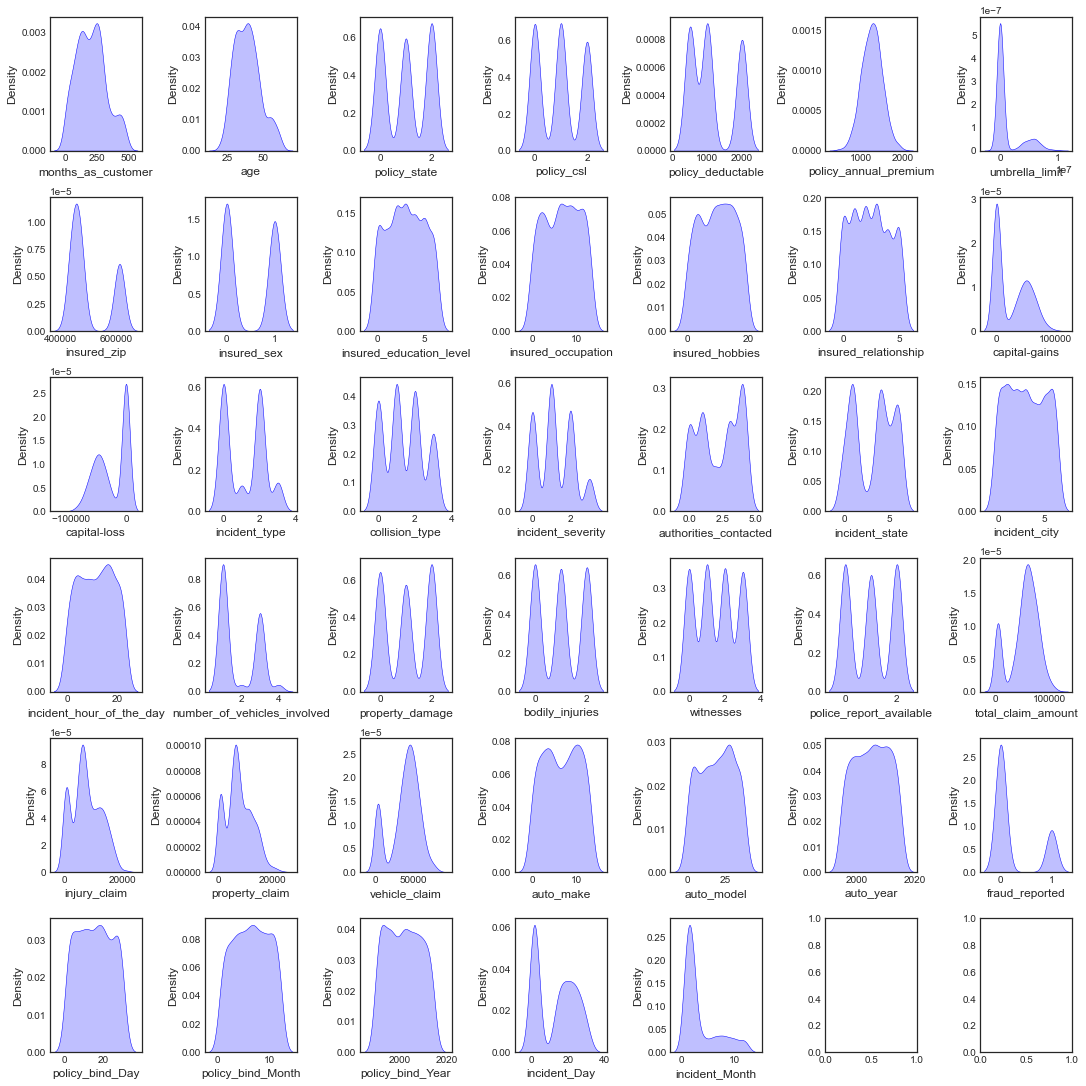

In [29]:
plt.style.use('seaborn-white')
fig, ax = plt.subplots(ncols=7, nrows=6, figsize=(15,15))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="blue", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

we can see that skewness is present in some of the columns , shich can be later taken care of using log transform

In [30]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                 0.126539
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage               -0.041341
bodily_injuries                0.014777


we can see some of the column have skewness more than the range(-0.5,0.5) which will need to be taken care of

Box Plot

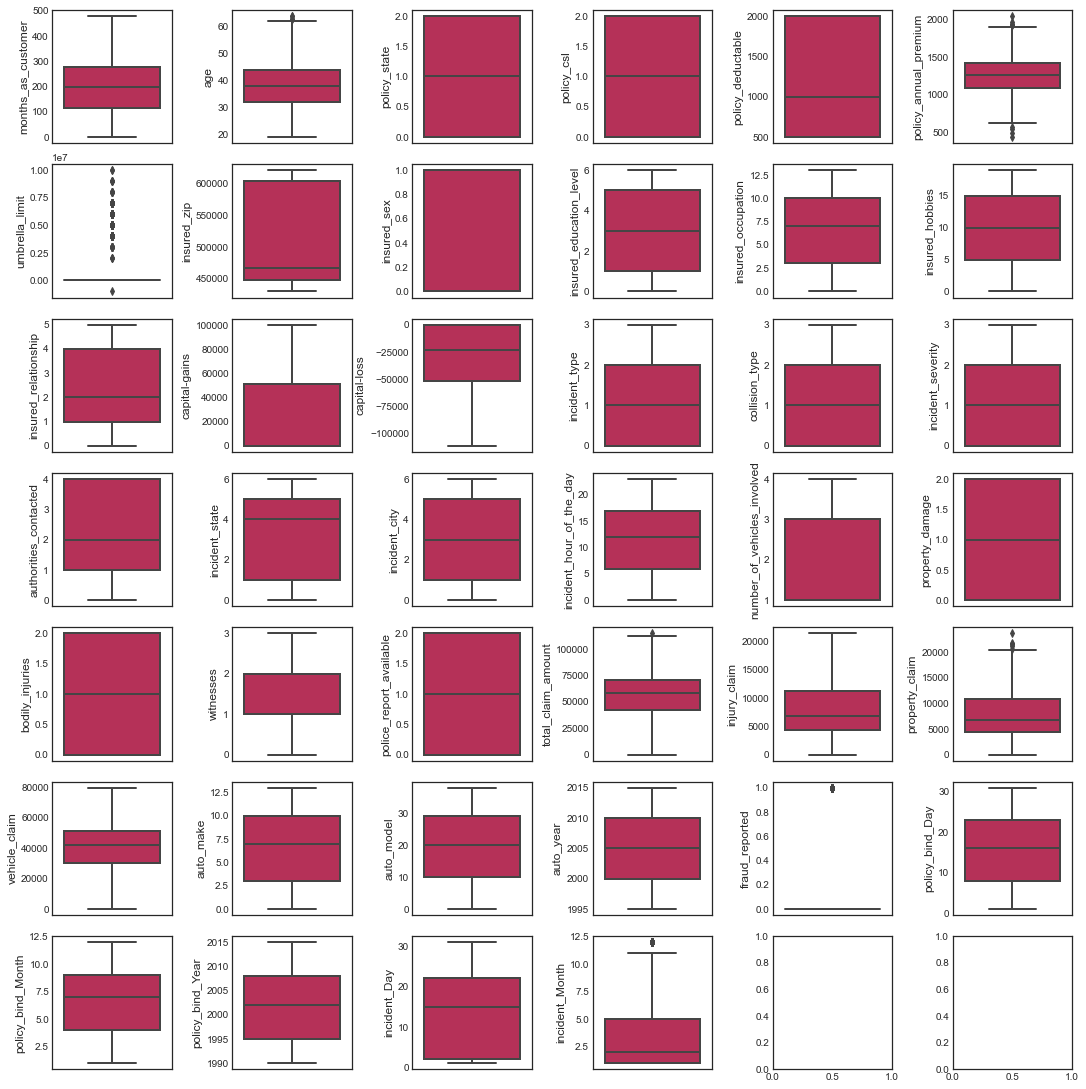

In [31]:
plt.style.use('fast')

fig, ax = plt.subplots(ncols=6, nrows=7, figsize=(15,15))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="rocket")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

we can see the prescense of ouliers. There are continuous ouxtliers present in umberella limit and few in policy annual premium and property claim. 

# Correlation with target label fraud_reported

In [32]:
df.corr()['fraud_reported'].sort_values()

incident_severity             -0.405988
collision_type                -0.135725
incident_state                -0.051407
incident_type                 -0.050376
insured_hobbies               -0.046838
authorities_contacted         -0.045802
incident_Day                  -0.044151
incident_city                 -0.040403
policy_csl                    -0.037190
policy_bind_Month             -0.030829
auto_make                     -0.027519
capital-gains                 -0.019173
capital-loss                  -0.014863
policy_annual_premium         -0.014480
policy_bind_Year              -0.000059
auto_model                     0.000720
insured_occupation             0.001564
incident_hour_of_the_day       0.004316
auto_year                      0.007928
police_report_available        0.008399
insured_education_level        0.008808
age                            0.012143
incident_Month                 0.014495
policy_deductable              0.014817
insured_zip                    0.019368


A positive correlation means that the independent and dependent variable move in the same direction

A negative correlation indicates that the independet and dependent variables move in the opposite direction

If we take the correlation range as (-0.5,0.5) then there are no highcorrelation values 

Now let us plot a heat map to understand the correlation better

<AxesSubplot:>

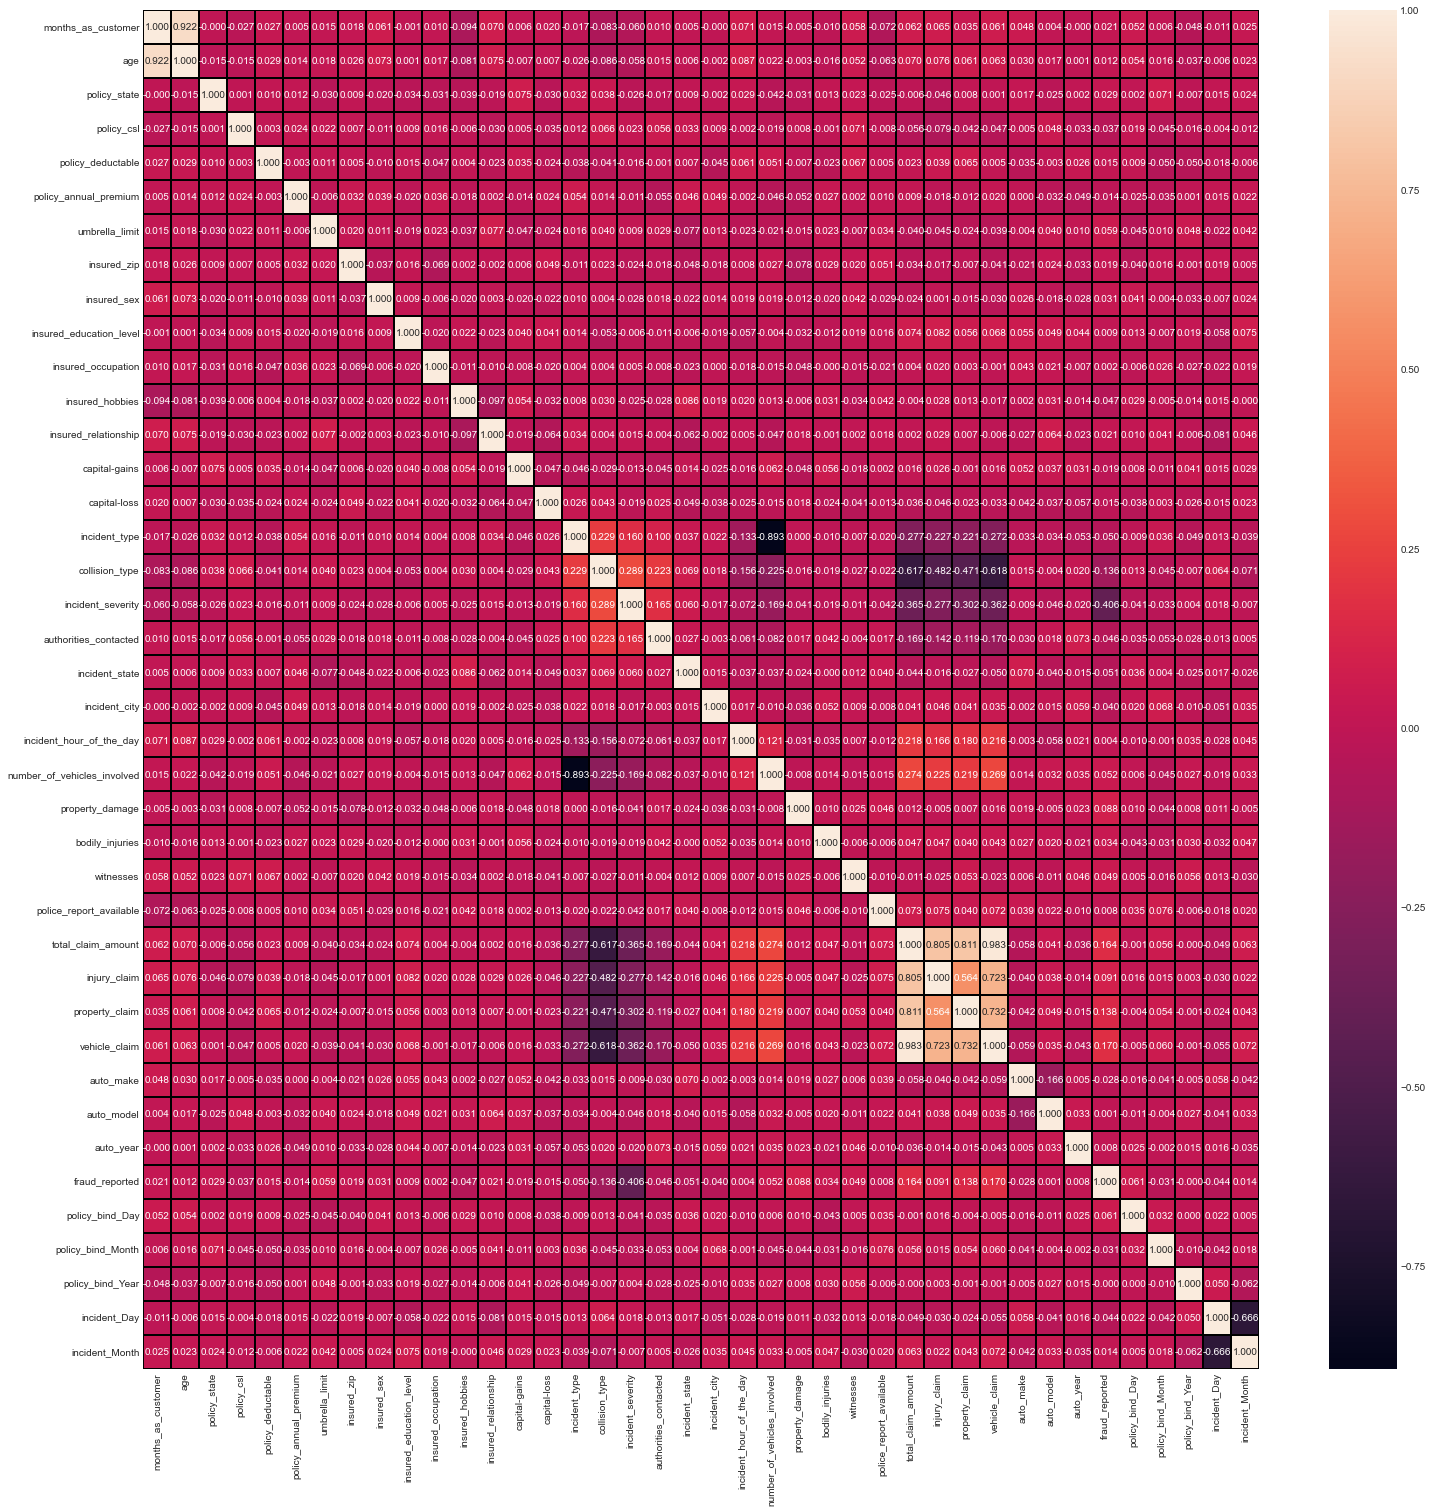

In [33]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='.3f')

the heat map is not clear but we can see some values which are multicollinear, but since they are important we shall retain them

# Correlation Bar Plot with our target variable fraud_reported

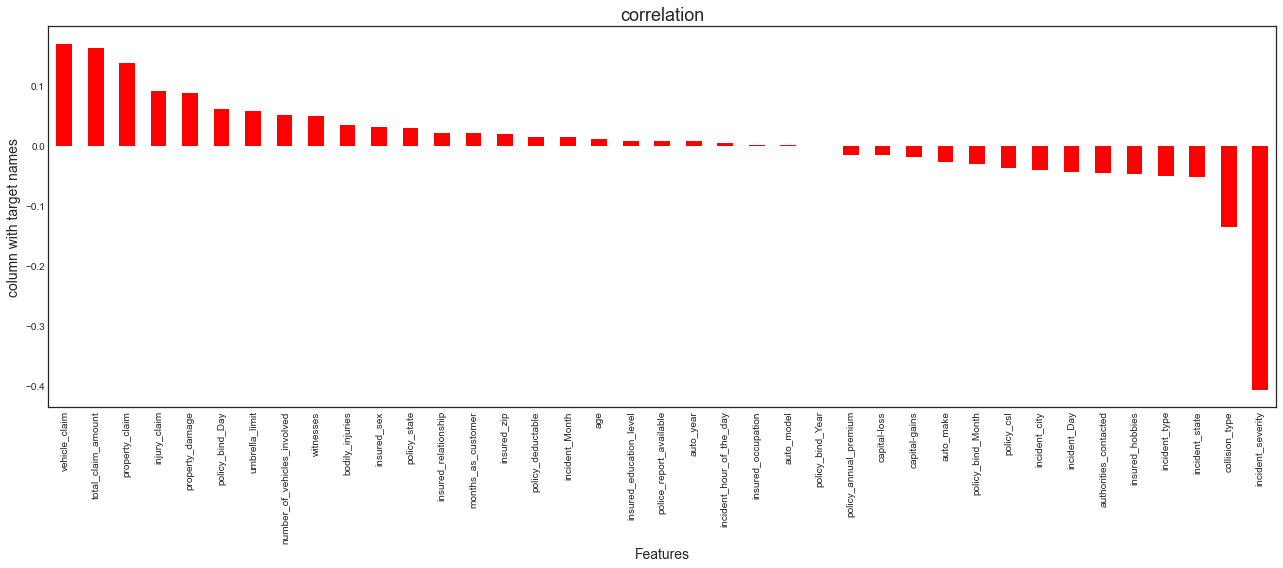

In [34]:
plt.figure(figsize=(22,7))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='red')
plt.xlabel('Features',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

we can clearly see the columns or features that are positively and negatively correlated with our target

# CHECKING OUTLIERS

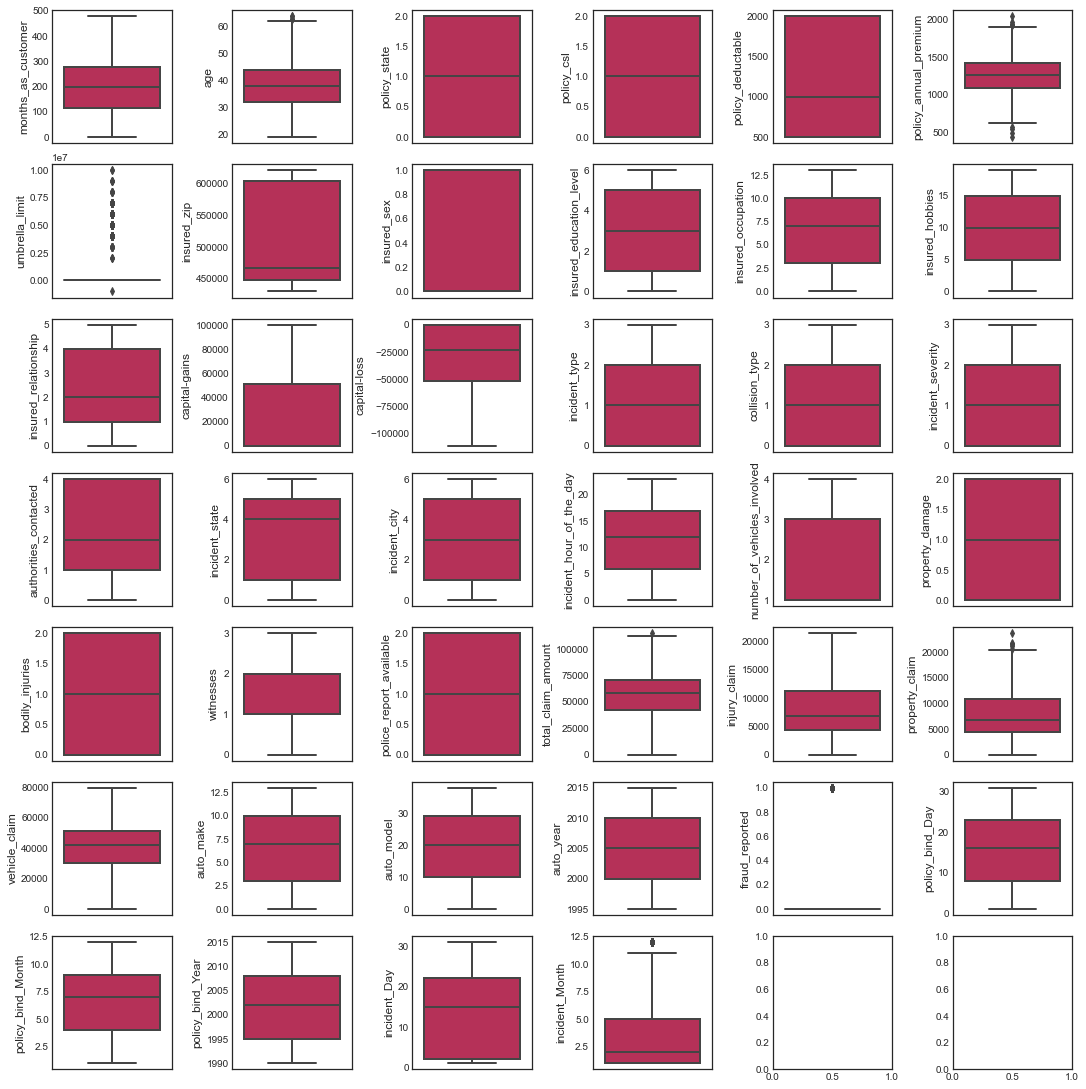

In [35]:
plt.style.use('fast')

fig, ax = plt.subplots(ncols=6, nrows=7, figsize=(15,15))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="rocket")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

we can see some ouliers are present

# Removing Outliers

In [36]:
df.shape

(1000, 40)

Applying ZScore to remove outliers

In [37]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
        657, 700, 763, 807, 875, 922, 975], dtype=int64),
 array([ 6,  6,  6,  6,  6,  5,  5,  6,  6,  6,  6, 29,  6,  6,  6,  5, 14,
         6,  6,  6], dtype=int64))

In [38]:
df.drop([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
        657, 700, 763, 807, 875, 922, 975],axis=0)

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                   328   48           2.0         1.0               1000   
1                   228   42           1.0         1.0               2000   
2                   134   29           2.0         0.0               2000   
3                   256   41           0.0         1.0               2000   
4                   228   44           0.0         2.0               1000   
..                  ...  ...           ...         ...                ...   
995                   3   38           2.0         2.0               1000   
996                 285   41           0.0         0.0               1000   
997                 130   34           2.0         1.0                500   
998                 458   62           0.0         2.0               2000   
999                 456   60           2.0         1.0               1000   

     policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                  1406.91               0       466132          1.0   
1                  1197.22         5000000       468176          1.0   
2                  1413.14         5000000       430632          0.0   
3                  1415.74         6000000       608117          0.0   
4                  1583.91         6000000       610706          1.0   
..                     ...             ...          ...          ...   
995                1310.80               0       431289          0.0   
996                1436.79               0       608177          0.0   
997                1383.49         3000000       442797          0.0   
998                1356.92         5000000       441714          1.0   
999                 766.19               0       612260          0.0   

     insured_education_level  insured_occupation  insured_hobbies  \
0                        4.0                 2.0             17.0   
1                        4.0                 6.0             15.0   
2                        6.0                11.0              2.0   
3                        6.0                 1.0              2.0   
4                        0.0                11.0              2.0   
..                       ...                 ...              ...   
995                      5.0                 2.0             13.0   
996                      6.0                 9.0             17.0   
997                      5.0                 1.0              3.0   
998                      0.0                 5.0              0.0   
999                      0.0                11.0             11.0   

     insured_relationship  capital-gains  capital-loss  incident_type  \
0                     0.0          53300             0            2.0   
1                     2.0              0             0            3.0   
2                     3.0          35100             0            0.0   
3                     4.0          48900        -62400            2.0   
4                     4.0          66000        -46000            3.0   
..                    ...            ...           ...            ...   
995                   4.0              0             0            2.0   
996                   5.0          70900             0            2.0   
997                   2.0          35100             0            0.0   
998                   5.0              0             0            2.0   
999                   0.0              0             0            1.0   

     collision_type  incident_severity  authorities_contacted  incident_state  \
0               2.0                0.0                    4.0             4.0   
1               3.0                1.0                    4.0             5.0   
2               1.0                1.0                    4.0             1.0   
3               0.0                0.0                    4.0             2.0   
4               3.0                1.0                    2.0             1.0   
..              ...    

In [39]:
df_new_z=df[(z<3).all(axis=1)]
print('Old Dataframe',df.shape)
print('New Dataframe',df_new_z.shape)
print('total_dropped_rows',df.shape[0]-df_new_z.shape[0])

Old Dataframe (1000, 40)
New Dataframe (980, 40)
total_dropped_rows 20


# Percentage Data Loss

In [40]:
Data_loss=((1000-980)/1000)*100
print(Data_loss,'%')

2.0 %


The percentage data loss is okay therefore we can proceed with our new dataframe

# Handling Skweness

In [41]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                 0.126539
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage               -0.041341
bodily_injuries                0.014777


# Applying Log Transform

In [42]:
for col in df_new_z:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.494499
insured_zip                    0.782405
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                 0.126539
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage               -0.041341
bodily_injuries                0.014777


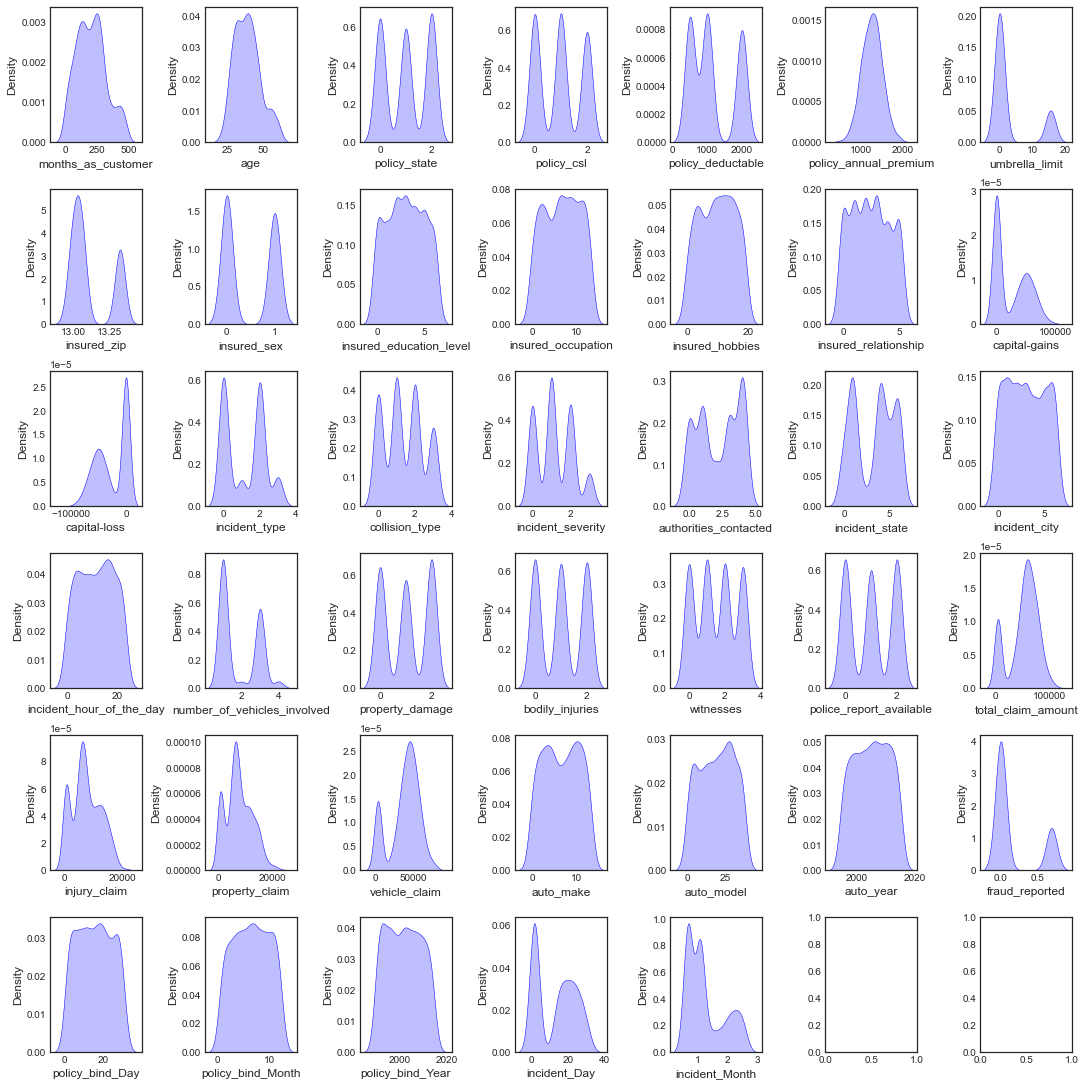

In [43]:
plt.style.use('seaborn-white')
fig, ax = plt.subplots(ncols=7, nrows=6, figsize=(15,15))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="blue", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

In [44]:
df.dropna(inplace=True)

# Clasification model with target variable fraud_reported

# Separating the columns into 'features' and 'targets' as 'x' and 'y' for our classification model

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier


from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [51]:
x=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

# Applying SMOTE

In [52]:
y.value_counts()

0    752
1    247
Name: fraud_reported, dtype: int64

we can see that our data is imbalanced

In [53]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
x,y=oversample.fit_resample(x,y)

In [54]:
y.value_counts()

1    752
0    752
Name: fraud_reported, dtype: int64

we have been successful in balancing our data

# Feature Scaling

i am scaling my data to avoid any biasness towards a column so that our data is standardized

In [55]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.10806556,  1.03026953,  1.22310526, ...,  1.79929838,
         1.27087989, -0.99963503],
       [ 0.19542819,  0.34940888, -0.05762495, ...,  0.6476249 ,
         0.8653416 , -0.99963503],
       [-0.66245094, -1.12578921,  1.22310526, ..., -0.21613021,
         0.96672617, -0.3134137 ],
       ...,
       [-0.3977861 , -0.89883566,  0.82491311, ..., -0.79196695,
         0.76395702, -0.99963503],
       [-1.14614875, -1.01231243, -1.18948684, ...,  0.21574734,
        -1.06096529,  1.14529833],
       [-0.84497842, -1.12578921, -1.33835516, ..., -0.3600894 ,
        -1.16234986,  1.51512311]])

# Finding the best accuracy at random state

In [57]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc_score = (accuracy_score(y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy is", maxAccu,"at Random State", maxRS)

Best accuracy is 81.72757475083057 at Random State 71


# Logistic Regression

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=16)

lr=LogisticRegression()
#training the model
lr.fit(x_train,y_train)
    
#Predicting y_test
pred=lr.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(lr,x,y,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  71.0261569416499

Classification Report 
               precision    recall  f1-score   support

           0       0.72      0.66      0.69       240
           1       0.71      0.75      0.73       257

    accuracy                           0.71       497
   macro avg       0.71      0.71      0.71       497
weighted avg       0.71      0.71      0.71       497

Cross Validation Score: 75.26843853820597

Accuracy Score - Cross Validation Score is -4.242281596556069


# Support vector classifier

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=16)

svc=SVC()
#training the model
svc.fit(x_train,y_train)
    
#Predicting y_test
pred=svc.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(svc,x,y,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  84.10462776659959

Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.84      0.84       240
           1       0.85      0.84      0.85       257

    accuracy                           0.84       497
   macro avg       0.84      0.84      0.84       497
weighted avg       0.84      0.84      0.84       497

Cross Validation Score: 85.17807308970099

Accuracy Score - Cross Validation Score is -1.0734453231013958


# Decision Tree Classifier

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=16)

dt=DecisionTreeClassifier()
#training the model
dt.fit(x_train,y_train)
    
#Predicting y_test
pred=dt.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(dt,x,y,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  80.48289738430584

Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       240
           1       0.81      0.81      0.81       257

    accuracy                           0.80       497
   macro avg       0.80      0.80      0.80       497
weighted avg       0.80      0.80      0.80       497

Cross Validation Score: 81.05404208194905

Accuracy Score - Cross Validation Score is -0.5711446976432057


# KNeighborsClassifier

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=16)

kn=KNeighborsClassifier()
#training the model
kn.fit(x_train,y_train)
    
#Predicting y_test
pred=kn.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(kn,x,y,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  61.56941649899397

Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.23      0.37       240
           1       0.58      0.97      0.72       257

    accuracy                           0.62       497
   macro avg       0.73      0.60      0.55       497
weighted avg       0.73      0.62      0.55       497

Cross Validation Score: 60.77275747508306

Accuracy Score - Cross Validation Score is 0.7966590239109053


# Random Forest Classifier

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=16)

rf=RandomForestClassifier()
#training the model
rf.fit(x_train,y_train)
    
#Predicting y_test
pred=rf.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(rf,x,y,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  85.71428571428571

Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       240
           1       0.87      0.85      0.86       257

    accuracy                           0.86       497
   macro avg       0.86      0.86      0.86       497
weighted avg       0.86      0.86      0.86       497

Cross Validation Score: 85.84296788482834

Accuracy Score - Cross Validation Score is -0.12868217054263198


# Extra Trees Classifier

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=16)

et=ExtraTreesClassifier()
#training the model
et.fit(x_train,y_train)
    
#Predicting y_test
pred=et.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(et,x,y,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  88.53118712273643

Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       240
           1       0.90      0.88      0.89       257

    accuracy                           0.89       497
   macro avg       0.89      0.89      0.89       497
weighted avg       0.89      0.89      0.89       497

Cross Validation Score: 89.16633444075306

Accuracy Score - Cross Validation Score is -0.6351473180166352


I will choose extra trees classifier for hyperparameter tuning as it is giving me the least value of accuracy score - cross validation along with a good accuracy

# Hyperparametertuning on decision tree classifier

In [64]:
fmod_param = {'criterion' : ['gini', 'entropy'],
              'n_jobs' : [-2, -1, 1],
              'random_state' : [42, 213, 1000],
              'max_depth' : [30, 40, 50],
              'n_estimators' : [300, 500, 700]
             }

i have chosen the above parameter after referring from the sklearn webpage

In [65]:
GSCV = GridSearchCV(ExtraTreesClassifier(), fmod_param, cv=5)

In [66]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [30, 40, 50],
                         'n_estimators': [300, 500, 700], 'n_jobs': [-2, -1, 1],
                         'random_state': [42, 213, 1000]})

In [67]:
GSCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 1000}

In [70]:
Final_Model = ExtraTreesClassifier(criterion='gini', max_depth=30, n_estimators=300, n_jobs=-2, random_state=1000)
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 88.93360160965796


the accuracy of my best model is 88.93%

# AOC ROC CRUVE

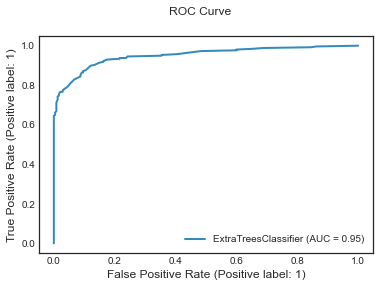

In [73]:
from sklearn import metrics
disp = metrics.plot_roc_curve(Final_Model, x_test, y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

The AUC ROC score of my model is 95%

# Confusion Matrix

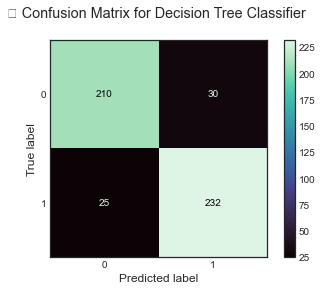

In [74]:
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, x_test, y_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()

From the confusion matrix we can see that our TP=210,FP=30,FN=25,TN=232

that means that are 210 postive values were correctly classified

30 negative values were correctly classified

232 postive values were incorrectly classified

30 negative values were incorrectly classifed

# MODEL SAVING

In [75]:
import pickle
filename='Insurance_Claims_Fraud_Detection.pkl'
pickle.dump(et,open(filename,'wb'))

# CONCLUSION

In [76]:
import numpy as np
a=np.array(y_test)
predicted=np.array(et.predict(x_test))
df_con=pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))
df_con

original  predicted
0           0          0
1           1          1
2           0          0
3           0          0
4           1          0
..        ...        ...
492         1          1
493         0          0
494         1          1
495         1          1
496         0          0

[497 rows x 2 columns]